# Chuẩn bị data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data=pd.ExcelFile(r"D:\Du An\Data ex\Đề thi Data Explorers 2025 - Vòng 1\Data_V1.xlsx")
data.sheet_names

['Khách hàng', 'Sản phẩm', 'Nhân viên', 'Dữ liệu bán hàng', 'Chi nhánh', 'KPI']

In [4]:
df_khachhang=pd.read_excel(r"D:\Du An\Data ex\Đề thi Data Explorers 2025 - Vòng 1\Data_V1.xlsx",sheet_name="Khách hàng")
df_sanpham=pd.read_excel(r"D:\Du An\Data ex\Đề thi Data Explorers 2025 - Vòng 1\Data_V1.xlsx",sheet_name="Sản phẩm")
df_nhanvien=pd.read_excel(r"D:\Du An\Data ex\Đề thi Data Explorers 2025 - Vòng 1\Data_V1.xlsx",sheet_name="Nhân viên")
df_dulieubanhang=pd.read_excel(r"D:\Du An\Data ex\Đề thi Data Explorers 2025 - Vòng 1\Data_V1.xlsx",sheet_name="Dữ liệu bán hàng")
df_chinhanh=pd.read_excel(r"D:\Du An\Data ex\Đề thi Data Explorers 2025 - Vòng 1\Data_V1.xlsx",sheet_name="Chi nhánh")
df_KPI=pd.read_excel(r"D:\Du An\Data ex\Đề thi Data Explorers 2025 - Vòng 1\Data_V1.xlsx",sheet_name="KPI")

In [121]:
df1 = df_dulieubanhang.groupby('Mã nhân viên bán')['Doanh thu'].sum()
sum(df_dulieubanhang['Doanh thu'])/249


4153164096.3855424

In [127]:
(df1 >= 4153164096.3855424).sum()

102

# Đánh giá theo khía cạnh sản phẩm

In [5]:
df_dulieubanhang.head(5)

,Ngày hạch toán,Đơn hàng,Mã KH,Mã Sản Phẩm,Số lượng bán,Đơn giá,Doanh thu,Giá vốn hàng hóa,Mã nhân viên bán,Chi nhánh,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2024-01-01,ĐH3381365,KH-0052,P-396,10,1215000,12150000,8100000,NV190,CN HN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01,ĐH8038262,KH-0257,P-545,5,11655000,58275000,38850000,NV164,CN DN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01,ĐH9049637,KH-0727,P-072,7,165000,1155000,770000,NV192,CN DN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01,ĐH1602374,KH-0716,P-530,3,28980000,86940000,57960000,NV233,CN HN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01,ĐH8875469,KH-0210,P-204,5,42120000,210600000,140400000,NV089,CN DN,NaN,NaN,NaN,NaN,NaN


cần loại bỏ các cột rỗng

In [6]:
df_dulieubanhang=df_dulieubanhang.drop(columns=[col for col in df_dulieubanhang.columns if "Unnamed" in col])

In [7]:
df_dulieusanpham=df_dulieubanhang.merge(df_sanpham,left_on="Mã Sản Phẩm",right_on="Mã Sản phẩm",how="left")

In [8]:
df_dulieusanpham.head(5)

,Ngày hạch toán,Đơn hàng,Mã KH,Mã Sản Phẩm,Số lượng bán,Đơn giá,Doanh thu,Giá vốn hàng hóa,Mã nhân viên bán,Chi nhánh,Mã Sản phẩm,Sản phẩm,Nhóm sản phẩm,Giá vốn
0,2024-01-01,ĐH3381365,KH-0052,P-396,10,1215000,12150000,8100000,NV190,CN HN,P-396,Bo mạch chính ASUS,Phụ kiện,810000
1,2024-01-01,ĐH8038262,KH-0257,P-545,5,11655000,58275000,38850000,NV164,CN DN,P-545,Máy tính để bàn Dell Inspiron 3670MT 70157879(...,Máy tính,7770000
2,2024-01-01,ĐH9049637,KH-0727,P-072,7,165000,1155000,770000,NV192,CN DN,P-072,Phần mềm diệt virus Bkav Pro 1,Phần mềm,110000
3,2024-01-01,ĐH1602374,KH-0716,P-530,3,28980000,86940000,57960000,NV233,CN HN,P-530,Máy chiếu Sony VPL-CH350,Phụ kiện,19320000
4,2024-01-01,ĐH8875469,KH-0210,P-204,5,42120000,210600000,140400000,NV089,CN DN,P-204,Phần mềm SecurityGateway Annual License 25 User,Phần mềm,28080000


In [9]:
df_check_dulieusanpham= df_dulieusanpham[(df_dulieusanpham["Số lượng bán"]==0)|(df_dulieusanpham["Doanh thu"]==0)|(df_dulieusanpham["Giá vốn hàng hóa"]==0)|(df_dulieusanpham["Đơn giá"]==0)]
df_check_dulieusanpham

,Ngày hạch toán,Đơn hàng,Mã KH,Mã Sản Phẩm,Số lượng bán,Đơn giá,Doanh thu,Giá vốn hàng hóa,Mã nhân viên bán,Chi nhánh,Mã Sản phẩm,Sản phẩm,Nhóm sản phẩm,Giá vốn
63,2024-01-03,ĐH6548383,KH-0755,P-538,7,0,0,0,NV169,CN HCM,P-538,Cáp mạng Cat6 3m,Phụ kiện,0
65,2024-01-03,ĐH8831319,KH-0607,P-156,10,0,0,0,NV142,CN HN,P-156,Card quản lý SIC cho Liebert ITA,Phụ kiện,0
89,2024-01-04,ĐH6370847,KH-0022,P-156,9,0,0,0,NV164,CN HN,P-156,Card quản lý SIC cho Liebert ITA,Phụ kiện,0
113,2024-01-04,ĐH7998538,KH-0229,P-150,1,0,0,0,NV042,CN HCM,P-150,Bản quyền phần mềm hiệu Palo Alto: PANDBURL fi...,Phần mềm,0
116,2024-01-05,ĐH3591327,KH-0012,P-346,2,0,0,0,NV171,CN HCM,P-346,Phần mềm quản trị tập trung ESET Remote Admini...,Phần mềm,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9777,2024-12-24,ĐH9301206,KH-0144,P-158,10,0,0,0,NV116,CN DN,P-158,Cáp kết nối cho ITA 16/20KVA,Phụ kiện,0
9799,2024-12-24,ĐH5542835,KH-0664,P-536,4,0,0,0,NV199,CN DN,P-536,Cáp mạng Cat6 1m,Phụ kiện,0
9802,2024-12-24,ĐH5942201,KH-0613,P-148,4,0,0,0,NV136,CN HN,P-148,Giấy chứng nhận dịch vụ bảo hành phần cứng: Pa...,Dịch vụ,0
9928,2024-12-29,ĐH9207500,KH-0556,P-538,8,0,0,0,NV211,CN HCM,P-538,Cáp mạng Cat6 3m,Phụ kiện,0


Nhận thấy dữ liệu bán hàng có một số mặt hàng có số lượng bán nhưng đơn giá, doanh thu, và giá vốn hàng hóa =0. Có thể đây là những mặt hàng được tặng kèm khuyến mại hoặc là lỗi hệ thống. Để kiểm tra, chúng ta xem các sản phẩm đó gồm những gì

In [10]:
check_so_luong_san_pham = df_check_dulieusanpham["Mã Sản phẩm"].nunique()
check_nhom_san_pham = df_check_dulieusanpham["Nhóm sản phẩm"].nunique()
check_danh_sach_nhom = df_check_dulieusanpham["Nhóm sản phẩm"].unique()

In [11]:
check_so_luong_san_pham,check_nhom_san_pham,check_danh_sach_nhom

(15, 3, array(['Phụ kiện', 'Phần mềm', 'Dịch vụ'], dtype=object))

In [12]:
df_tyle0doanhthu = df_check_dulieusanpham.groupby("Nhóm sản phẩm")["Số lượng bán"].sum().reset_index()
df_tyle0doanhthu

,Nhóm sản phẩm,Số lượng bán
0,Dịch vụ,167
1,Phần mềm,242
2,Phụ kiện,670


In [13]:
df_tyle0doanhthu["Tỷ lệ (%)"] = (df_tyle0doanhthu["Số lượng bán"] / df_tyle0doanhthu["Số lượng bán"].sum()) * 100
df_tyle0doanhthu

,Nhóm sản phẩm,Số lượng bán,Tỷ lệ (%)
0,Dịch vụ,167,15.477294
1,Phần mềm,242,22.428174
2,Phụ kiện,670,62.094532


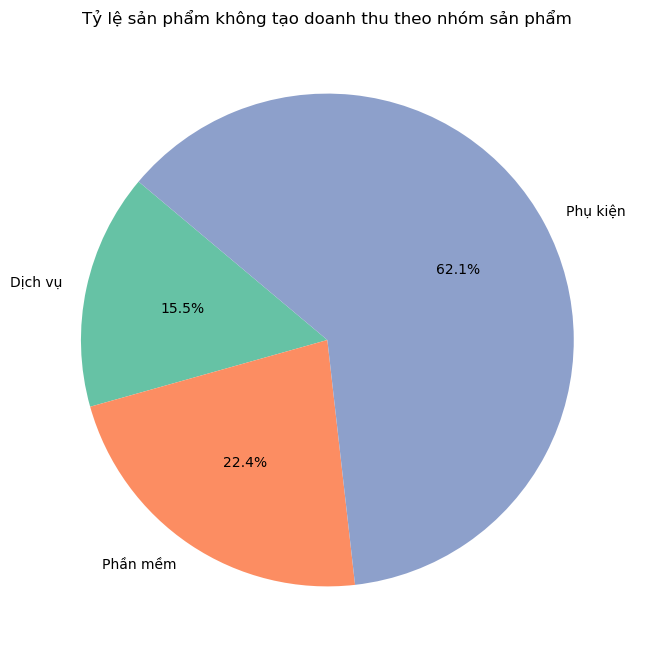

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(df_tyle0doanhthu["Tỷ lệ (%)"], labels=df_tyle0doanhthu["Nhóm sản phẩm"], autopct="%1.1f%%", colors=sns.color_palette("Set2"), startangle=140)
plt.title("Tỷ lệ sản phẩm không tạo doanh thu theo nhóm sản phẩm")
plt.show()

tất cả các sản phẩm không có doanh thu và giá vốn đều là sản phẩm tặng kèm. trong đó có tất cả 15 loại sản phẩm phụ kiện, phần mềm, dịch vụ trong đó phần lớn là phụ kiện

In [15]:
df_dulieusanpham_clean= df_dulieusanpham[(df_dulieusanpham["Số lượng bán"]>0)&(df_dulieusanpham["Đơn giá"]>0)&(df_dulieusanpham["Doanh thu"]>0)&(df_dulieusanpham["Giá vốn hàng hóa"]>0)]
df_dulieusanpham_clean

,Ngày hạch toán,Đơn hàng,Mã KH,Mã Sản Phẩm,Số lượng bán,Đơn giá,Doanh thu,Giá vốn hàng hóa,Mã nhân viên bán,Chi nhánh,Mã Sản phẩm,Sản phẩm,Nhóm sản phẩm,Giá vốn
0,2024-01-01,ĐH3381365,KH-0052,P-396,10,1215000,12150000,8100000,NV190,CN HN,P-396,Bo mạch chính ASUS,Phụ kiện,810000
1,2024-01-01,ĐH8038262,KH-0257,P-545,5,11655000,58275000,38850000,NV164,CN DN,P-545,Máy tính để bàn Dell Inspiron 3670MT 70157879(...,Máy tính,7770000
2,2024-01-01,ĐH9049637,KH-0727,P-072,7,165000,1155000,770000,NV192,CN DN,P-072,Phần mềm diệt virus Bkav Pro 1,Phần mềm,110000
3,2024-01-01,ĐH1602374,KH-0716,P-530,3,28980000,86940000,57960000,NV233,CN HN,P-530,Máy chiếu Sony VPL-CH350,Phụ kiện,19320000
4,2024-01-01,ĐH8875469,KH-0210,P-204,5,42120000,210600000,140400000,NV089,CN DN,P-204,Phần mềm SecurityGateway Annual License 25 User,Phần mềm,28080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-12-31,ĐH4004145,KH-0531,P-516,3,10545000,31635000,21090000,NV111,CN DN,P-516,Phần mềm Veritas ESSENTIAL 12 MONTHS RENEWAL F...,Phần mềm,7030000
9996,2024-12-31,ĐH8630580,KH-0011,P-231,1,135000,135000,90000,NV027,CN HCM,P-231,Phần mềm O365XtraFileStrgOpn ShrdSvr SNGL Subs...,Phần mềm,90000
9997,2024-12-31,ĐH6609076,KH-0088,P-065,8,8130000,65040000,43360000,NV016,CN HCM,P-065,Phần mềm After Effects CC for team ALL Multipl...,Phần mềm,5420000
9998,2024-12-31,ĐH5873045,KH-0365,P-635,1,930000,930000,620000,NV171,CN DN,P-635,Phần mềm Sophos 1 Year Endpoint Protection Sta...,Phần mềm,620000


In [16]:
check_so_luong_san_pham_clean = df_dulieusanpham_clean["Mã Sản Phẩm"].nunique()
check_nhom_san_pham_clean = df_dulieusanpham_clean["Nhóm sản phẩm"].nunique()
check_danh_sach_nhom_clean = df_dulieusanpham_clean["Nhóm sản phẩm"].unique()

In [17]:
check_so_luong_san_pham_clean,check_nhom_san_pham_clean,check_danh_sach_nhom_clean

(784, 4, array(['Phụ kiện', 'Máy tính', 'Phần mềm', 'Dịch vụ'], dtype=object))

In [18]:
df_tyledoanhthu = df_dulieusanpham_clean.groupby("Nhóm sản phẩm")["Số lượng bán"].sum().reset_index()
df_tyledoanhthu

,Nhóm sản phẩm,Số lượng bán
0,Dịch vụ,265
1,Máy tính,2828
2,Phần mềm,37842
3,Phụ kiện,13256


In [19]:
df_tyledoanhthu["Tỷ lệ (%)"] = (df_tyledoanhthu["Số lượng bán"] / df_tyledoanhthu["Số lượng bán"].sum()) * 100
df_tyledoanhthu

,Nhóm sản phẩm,Số lượng bán,Tỷ lệ (%)
0,Dịch vụ,265,0.489011
1,Máy tính,2828,5.218579
2,Phần mềm,37842,69.830784
3,Phụ kiện,13256,24.461626


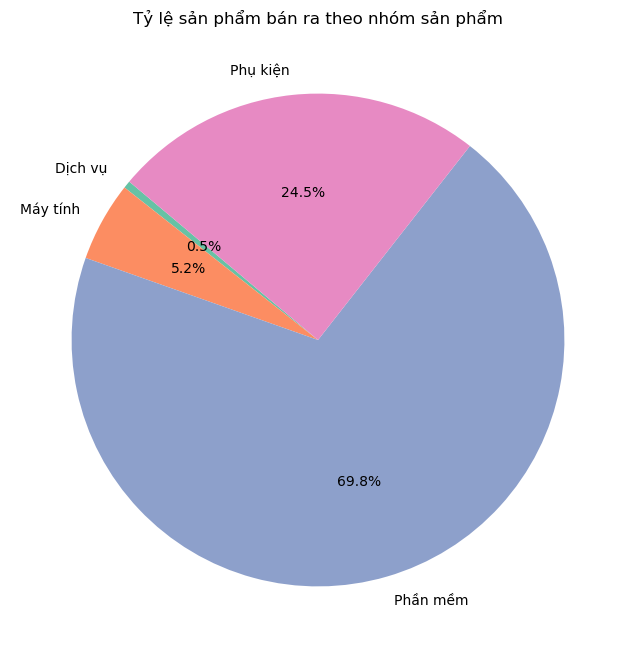

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(df_tyledoanhthu["Tỷ lệ (%)"], labels=df_tyledoanhthu["Nhóm sản phẩm"], autopct="%1.1f%%", colors=sns.color_palette("Set2"), startangle=140)
plt.title("Tỷ lệ sản phẩm bán ra theo nhóm sản phẩm")
plt.show()

Phần mềm là nhóm sản phẩm chiếm tỷ lệ lớn nhất (69.8%) cho thấy đây là khía cạnh tạo ra doanh thu chính của doanh nghiệp.
Tiếp đó là phụ kiện chiếm 24.5%, Máy tính chiếm 5.2% doanh thu, dịch vụ chiếm rất ít chỉ 0.5%

In [21]:
import re
def count_cong_ty(df, column_name):
    pattern = re.compile(r'công ty|văn phòng', re.IGNORECASE)  # Biểu thức chính quy không phân biệt hoa thường
    count = df[column_name].str.contains(pattern, na=False).sum()
    return count

In [22]:
tdem=len(df_khachhang["Khách hàng"])
dem=count_cong_ty(df_khachhang,"Khách hàng")
others=tdem-dem
others

65

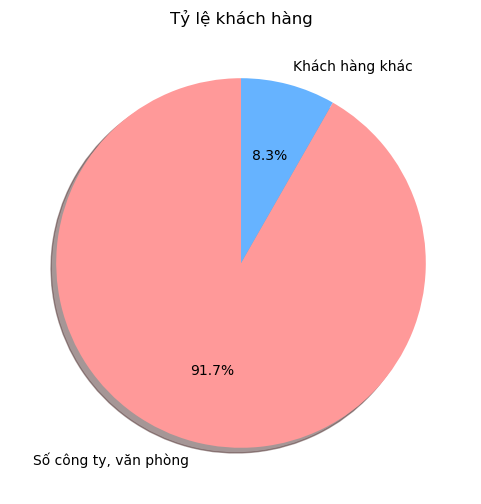

In [23]:
labels = ["Số công ty, văn phòng", "Khách hàng khác"]
sizes = [dem, others]
colors = ["#ff9999", "#66b3ff"]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title("Tỷ lệ khách hàng")
plt.show()

Như đã thấy, có tới hơn 90% khách hàng là các công ty, văn phòng và hơn 8% là các khách hàng lẻ khác. Đây cũng là lý giải về việc tại sao số lượng máy tính chỉ 2828 máy, chỉ chiếm 5.218579%. Vì nếu tập trung vào khách lẻ, sản phẩm chính sẽ là máy tính.

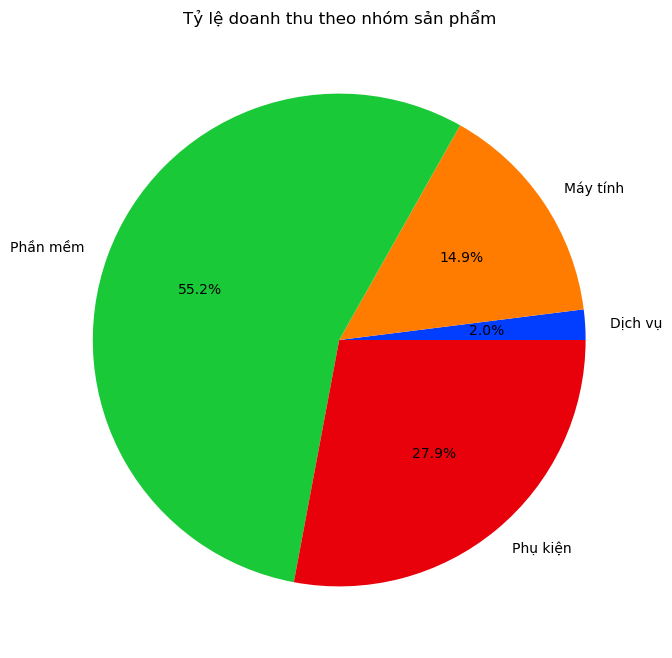

In [24]:
df_group = df_dulieusanpham_clean.groupby('Nhóm sản phẩm')['Doanh thu'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(df_group['Doanh thu'], labels=df_group['Nhóm sản phẩm'], autopct='%1.1f%%', colors=sns.color_palette('bright'))
plt.title('Tỷ lệ doanh thu theo nhóm sản phẩm')
plt.show()


Phần mềm chiếm 69.8% số lượng sản phẩm nhưng chỉ đóng góp 55.2% doanh thu. Điều này cho thấy nhiều sản phẩm phần mềm có doanh thu không quá cao.

Phụ kiện chiếm 24.5% số lượng sản phẩm và 27.9% doanh thu, phản ánh sự ổn định giữa số lượng sản phẩm và doanh thu.

Máy tính chiếm 5.2% số lượng sản phẩm nhưng đóng góp 14.9% doanh thu, cho thấy đây là nhóm sản phẩm có giá trị cao hơn mỗi đơn vị.

Dịch vụ chỉ chiếm rất nhỏ với 0.5% đóng góp 2% doanh thu

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\632583408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sản phẩm', x='Doanh thu', data=df_doanh_thu.head(10), palette='viridis')


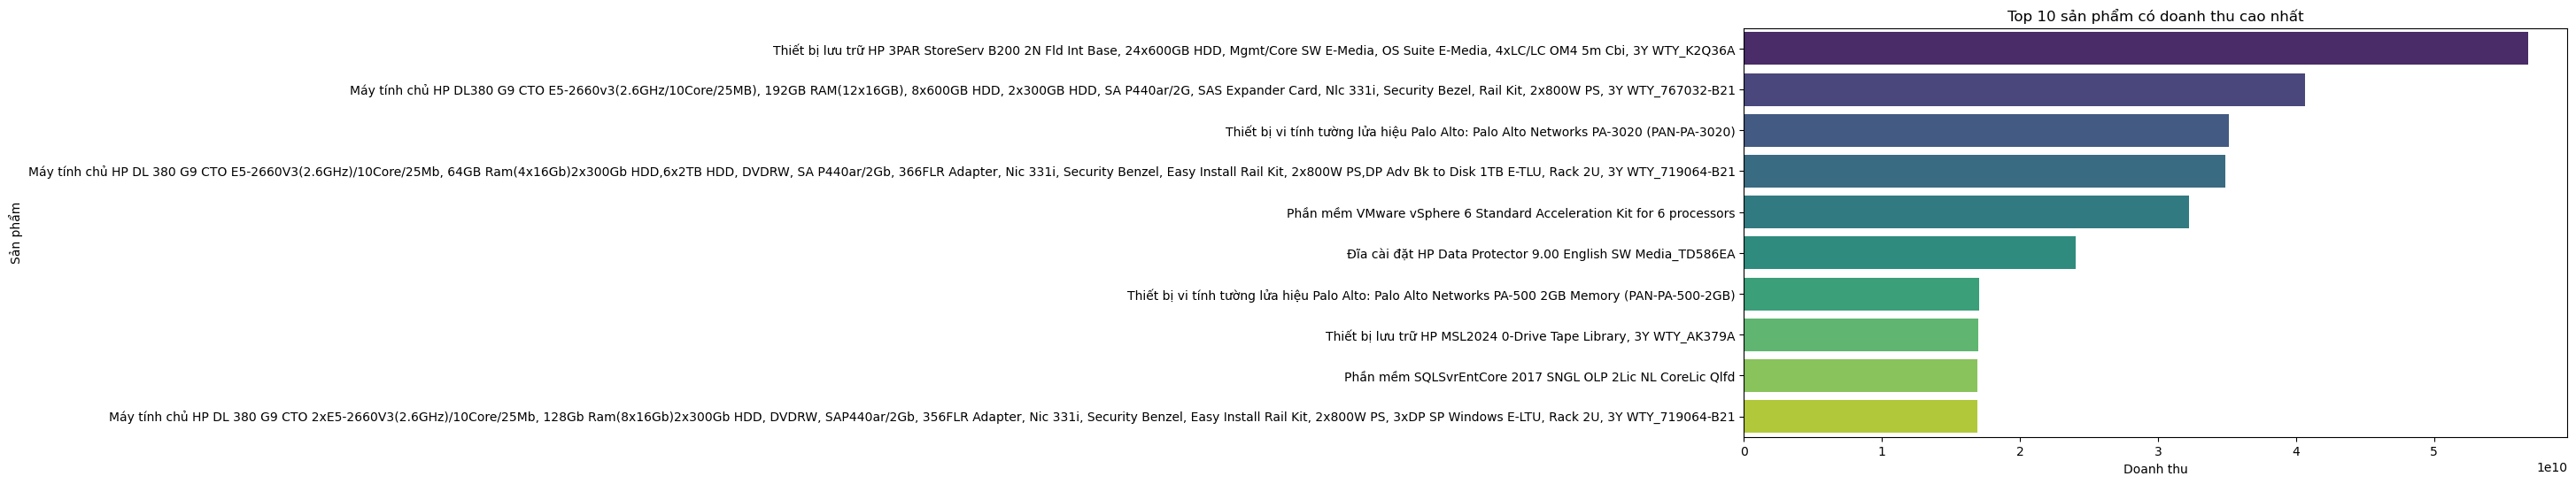

In [25]:
df_doanh_thu = df_dulieusanpham_clean.groupby('Sản phẩm')['Doanh thu'].sum().reset_index()
df_doanh_thu = df_doanh_thu.sort_values(by='Doanh thu', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y='Sản phẩm', x='Doanh thu', data=df_doanh_thu.head(10), palette='viridis')
plt.title('Top 10 sản phẩm có doanh thu cao nhất')
plt.xlabel('Doanh thu')
plt.ylabel('Sản phẩm')
plt.show()

In [26]:
df_doanh_thu.head(10)
# tính xem có sản phẩm nào gánh cả nhóm không

,Sản phẩm,Doanh thu
695,Thiết bị lưu trữ HP 3PAR StoreServ B200 2N Fld...,56809350000
166,Máy tính chủ HP DL380 G9 CTO E5-2660v3(2.6GHz/...,40629150000
703,Thiết bị vi tính tường lửa hiệu Palo Alto: Pal...,35128770000
164,Máy tính chủ HP DL 380 G9 CTO E5-2660V3(2.6GHz...,34906950000
610,Phần mềm VMware vSphere 6 Standard Acceleratio...,32241510000
759,Đĩa cài đặt HP Data Protector 9.00 English SW ...,24040500000
704,Thiết bị vi tính tường lửa hiệu Palo Alto: Pal...,17045490000
696,Thiết bị lưu trữ HP MSL2024 0-Drive Tape Libra...,17006460000
518,Phần mềm SQLSvrEntCore 2017 SNGL OLP 2Lic NL C...,16918170000
162,Máy tính chủ HP DL 380 G9 CTO 2xE5-2660V3(2.6G...,16896915000


1: phụ kiện: 56809350000 
2: máy tính: 40629150000 
3: phụ kiện: 35128770000
4: máy tính: 34906950000
5: phần mềm : 32241510000
6: phụ kiện: 24040500000
7: phụ kiện: 17045490000
8: phụ kiện: 17006460000
9: phần mềm: 16918170000
10: máy tính: 16896915000

trong 10 sản phẩm có doanh thu cao nhất, có 1 nửa trong số đó là phụ kiện với doanh thu cao nhất đạt 56.8 nghìn tỷ, 3 sản phẩm là máy tính doanh thu cao nhất đạt 40.6 nghìn tỷ và 2 sản phẩm là phần mềm đạt doanh thu cao nhất là 32.2 nghìn tỷ.

Phần mềm chiếm tỷ trọng lớn nhất trong tổng doanh thu (55.2%), nhưng trong danh sách top 10 sản phẩm có doanh thu cao nhất, chỉ có 2 sản phẩm phần mềm (hạng 5 và hạng 9).

Phụ kiện chiếm 27.9% doanh thu nhưng có đến 5 sản phẩm nằm trong top 10 (hạng 1, 3, 6, 7, 8). Điều này cho thấy phụ kiện có một số sản phẩm chủ lực đạt doanh thu cao.

Máy tính đóng góp 14.9% doanh thu nhưng cũng có 3 sản phẩm trong top 10 (hạng 2, 4, 10).

In [27]:
df_dulieusanpham_clean['Lợi nhuận'] = df_dulieusanpham_clean['Doanh thu'] - df_dulieusanpham_clean['Giá vốn hàng hóa']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\428985287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dulieusanpham_clean['Lợi nhuận'] = df_dulieusanpham_clean['Doanh thu'] - df_dulieusanpham_clean['Giá vốn hàng hóa']


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\2546867642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sản phẩm', x='Lợi nhuận', data=df_loi_nhuan.head(10), palette='viridis')


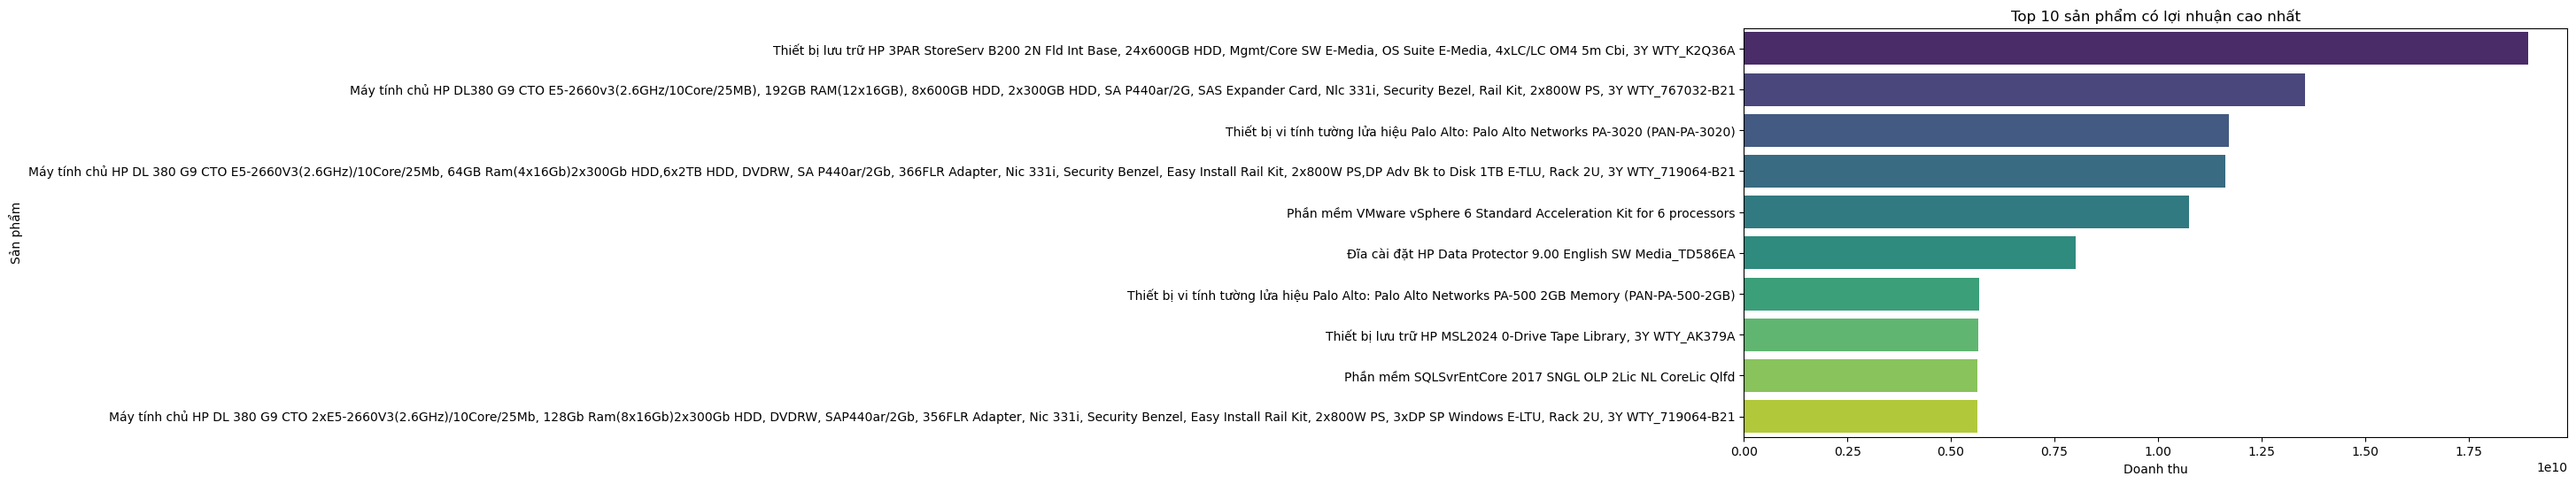

In [28]:
df_loi_nhuan = df_dulieusanpham_clean.groupby('Sản phẩm')['Lợi nhuận'].sum().reset_index()
df_loi_nhuan = df_loi_nhuan.sort_values(by='Lợi nhuận', ascending=False)
df_pie_profit = df_loi_nhuan.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y='Sản phẩm', x='Lợi nhuận', data=df_loi_nhuan.head(10), palette='viridis')
plt.title('Top 10 sản phẩm có lợi nhuận cao nhất')
plt.xlabel('Doanh thu')
plt.ylabel('Sản phẩm')
plt.show()

In [29]:
df_loi_nhuan.head(10)

,Sản phẩm,Lợi nhuận
695,Thiết bị lưu trữ HP 3PAR StoreServ B200 2N Fld...,18936450000
166,Máy tính chủ HP DL380 G9 CTO E5-2660v3(2.6GHz/...,13543050000
703,Thiết bị vi tính tường lửa hiệu Palo Alto: Pal...,11709590000
164,Máy tính chủ HP DL 380 G9 CTO E5-2660V3(2.6GHz...,11635650000
610,Phần mềm VMware vSphere 6 Standard Acceleratio...,10747170000
759,Đĩa cài đặt HP Data Protector 9.00 English SW ...,8013500000
704,Thiết bị vi tính tường lửa hiệu Palo Alto: Pal...,5681830000
696,Thiết bị lưu trữ HP MSL2024 0-Drive Tape Libra...,5668820000
518,Phần mềm SQLSvrEntCore 2017 SNGL OLP 2Lic NL C...,5639390000
162,Máy tính chủ HP DL 380 G9 CTO 2xE5-2660V3(2.6G...,5632305000


xếp hạng top 10 doanh thu tương tự top 10 lợi nhuận

Insight 1 : có thể thấy tuy phần mềm đang là nguồn tạo doanh thu chính của công ty nhưng phụ kiện góp mặt tới 5/10 sản phẩm top 10, chứng tỏ đây là 1 mảng chúng ta cần khai thác thêm, cùng với sự ổn định giữa số lượng sản phẩm và doanh thu chứng tỏ hiệu quả của mặt hàng này.

insight 2: máy tính là mặt hàng có ít sản phẩm bán ra nhưng lại có hiệu quả doanh thu rất cao.  công ty nên mở rộng và tập trung thêm vào mảng này để tối ưu hóa lợi nhuận

# góc nhìn theo thời gian

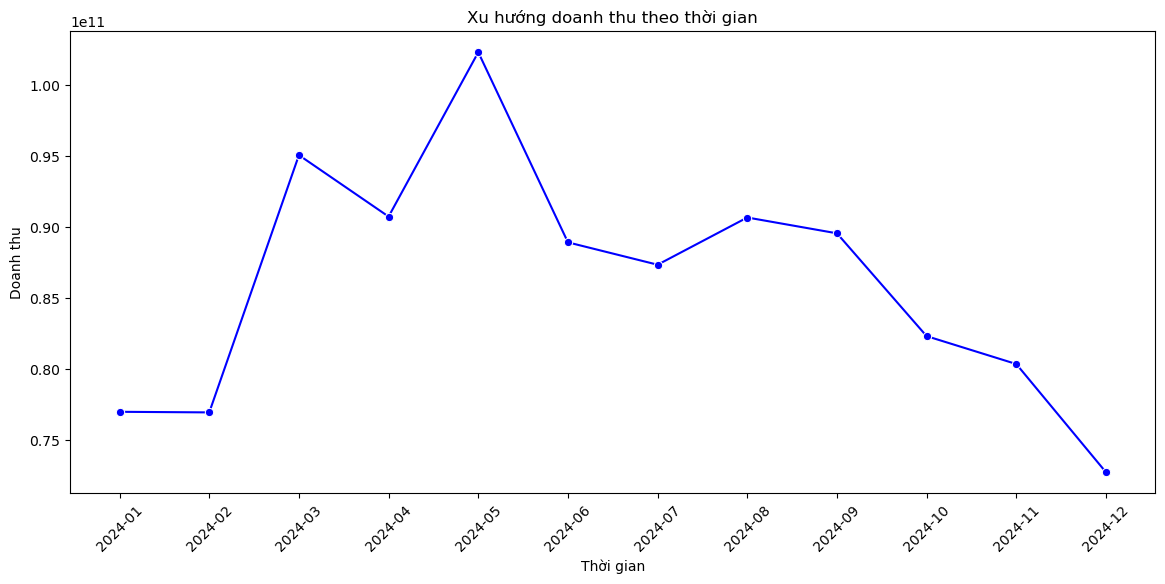

In [30]:
df_time_series = df_dulieusanpham_clean.groupby(df_dulieusanpham_clean['Ngày hạch toán'].dt.to_period('M'))['Doanh thu'].sum().reset_index()
df_time_series['Ngày hạch toán'] = df_time_series['Ngày hạch toán'].astype(str)
plt.figure(figsize=(14, 6))
sns.lineplot(x='Ngày hạch toán', y='Doanh thu', data=df_time_series, marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Xu hướng doanh thu theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.show()

In [31]:
# kiểm tra biến động giá
# do tính chất sản phẩm công nghệ

xu hướng doanh thu trong tháng 1 và tháng 2 duy trì ổn định như có sự tăng đột ngột trong giai đoạn tháng 2 - tháng 3 rồi đạt đỉnh ở tháng 5. Sau đó giảm xuống vào giai đoạn tháng 6, giảm nhẹ vào tháng 7 và thay đổi nhẹ đến tháng 9. Sau đó doanh thu giảm mạnh liên tục, giai đoạn tháng 10-11 có chững lại chút rồi lại giảm mạnh vào tháng 12

Lý giải : thời điểm này gắn liền với 1 sự kiện quan trọng trong năm với người Việt là Tết Nguyên Đán diễn ra vào gần giữa tháng 2 dương lịch. Trước Tết, nhu cầu của mọi người tập trung vào thực phẩm, quà tặng, trang trí,... dẫn đến giảm nhu cầu mua những sản phẩm như phần mềm, máy tính, phụ kiện,... Trái ngược lại, sau Tết là thời điểm nhu cầu tiêu dùng các mặt hàng khác mạnh mẽ trở lại do đây là thời điểm mà các doanh nghiệp bắt đầy chu kỳ làm việc trở lại. Đồng thời, từ nguồn lợi nhuận cuối năm, các doanh nghiệp có thể sử dụng để đầu tư vào công nghệ như phầm mềm quản lý, thiết bị phụ kiện hỗ trợ công việc. Về đối tượng khách lẻ cũng như vậy, cộng thêm tâm lý đổi mới sau Tết

Trước Tết, thị trường công nghệ cũng sẽ tung ra nhiều khuyến mãi để kích cầu mua sắm, các hãng, nhà bản lẻ cũng sẽ giảm giá, tặng quà. Điểm của việc này là sự đa dạng về mẫu mã. TUY NHIÊN, các doanh nghiệp sẽ ưu tiên mua sau Tết hơn vì đây là lúc nhiều của hàng tung đợt xả hàng tồn kho và chuẩn bị đón mẫu sản phẩm mới. Tức doanh nghiệp có nhiều lựa chọn giá rẻ mà vẫn đáp ứng hiệu năng tốt. Kể cả các mẫu máy cao cấp cũng có mức giá tốt hơn dịp trước Tết

giai đoạn tụt giảm doanh thu sau giai đoạn tháng 5 do doanh nghiệp và người tiêu dùng đều đã hoàn thành mua sắm đầu năm. Sự thay đổi trong giai đoạn hè - thu có thể do các chương trình khuyến mãi mùa hè hoặc back to school. Tuy nhiên sự ảnh hưởng này không đủ lớn để đẩy doanh thu cao lên như đầu năm

những tháng cuối năm giảm mạnh dao nhu cầu chi tiêu của các doanh nghiệp tập chung và những mặt khác. Sự chững lại nhẹ có thể do các chương trình Black friday/ cyber monday, đến tháng 12 thì sụt giảm hẳn do sự chuẩn bị cho Tết âm và các vấn đề khác

Insight : Sau tết là thời gian cao điểm ( có tính mùa vụ), ảnh hưởng bởi ngân sách, chiến lược kinh doanh và tâm lý các doanh nghiệp.

Đề xuất: 

Tăng cường khuyến mãi: Tổ chức các chương trình giảm giá vào tháng 10-11 để tận dụng xu hướng mua sắm cuối năm, tránh doanh thu giảm mạnh.

Nâng cao sản phẩm: Đẩy mạnh bán các sản phẩm phần mềm hoặc phụ kiện giá trị cao vào giữa năm (tháng 7-9) để duy trì doanh thu.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\3293222265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dulieusanpham_clean['Ngày hạch toán'] = pd.to_datetime(df_dulieusanpham_clean['Ngày hạch toán'])


<Figure size 1200x600 with 0 Axes>

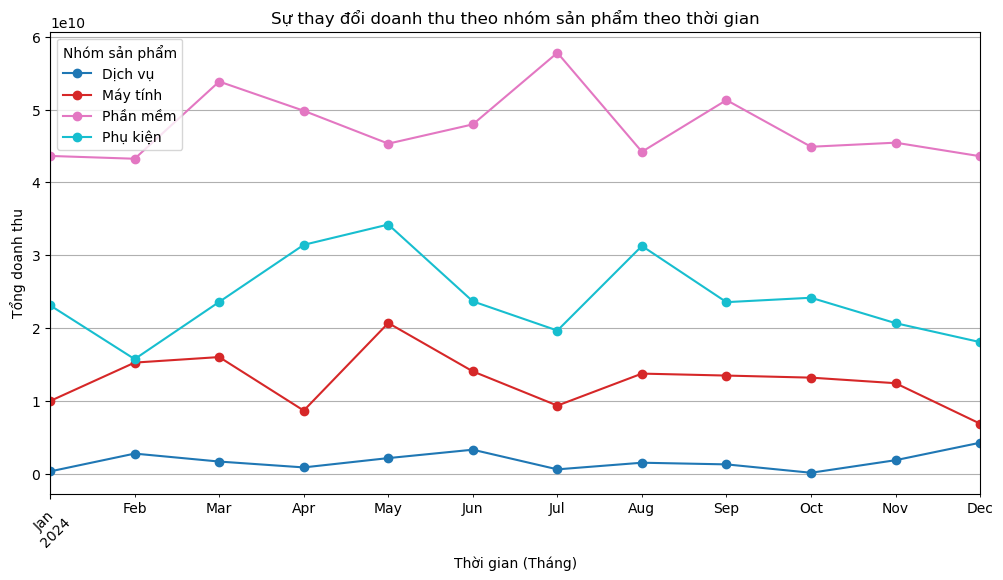

In [32]:

df_dulieusanpham_clean['Ngày hạch toán'] = pd.to_datetime(df_dulieusanpham_clean['Ngày hạch toán'])

# Nhóm doanh thu theo tháng và nhóm sản phẩm
df_grouped = df_dulieusanpham_clean.groupby([df_dulieusanpham_clean['Ngày hạch toán'].dt.to_period('M'), 'Nhóm sản phẩm'])['Doanh thu'].sum().unstack()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='line', marker='o', colormap='tab10', figsize=(12, 6))
plt.title("Sự thay đổi doanh thu theo nhóm sản phẩm theo thời gian")
plt.xlabel("Thời gian (Tháng)")
plt.ylabel("Tổng doanh thu")
plt.xticks(rotation=45)
plt.legend(title="Nhóm sản phẩm")
plt.grid(True)
plt.show()


phần mềm luôn là sản phẩm có doanh thu cao nhất, hơn hẳn các sản phẩm còn lại

Doanh thu của phụ kiện cao hơn máy tính, dễ nhận thấy có đôi nét khá tương đồng của 2 đường này, cho thấy doanh thu của máy tính và doanh thu của phụ kiện đồng biến 

<Figure size 1200x600 with 0 Axes>

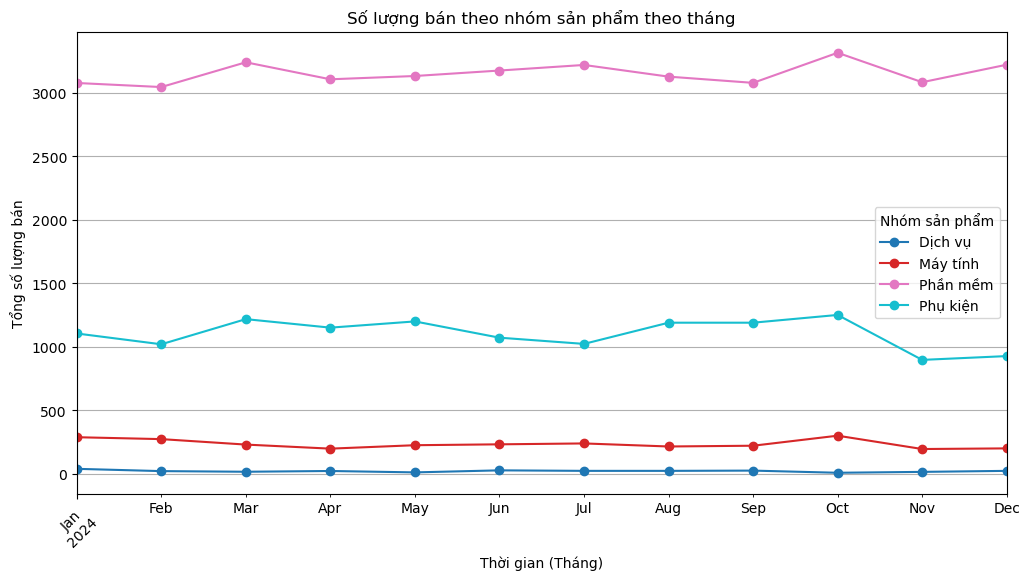

In [33]:
df_quantity = df_dulieusanpham_clean.groupby([df_dulieusanpham_clean['Ngày hạch toán'].dt.to_period('M'), 'Nhóm sản phẩm'])['Số lượng bán'].sum().unstack()

plt.figure(figsize=(12, 6))
df_quantity.plot(kind='line', marker='o', colormap='tab10', figsize=(12, 6))
plt.title("Số lượng bán theo nhóm sản phẩm theo tháng")
plt.xlabel("Thời gian (Tháng)")
plt.ylabel("Tổng số lượng bán")
plt.xticks(rotation=45)
plt.legend(title="Nhóm sản phẩm")
plt.grid(True)
plt.show()

In [34]:
# tại sao tháng 7 lại có doanh khác hẳn

số lượng bán của phần mềm và phụ kiện có nét tương đồng trong giai đoạn đầu năm tới tháng 5

số lượng bán của phần mềm, phụ kiện, máy tính không có nhiều dao động như doanh thu. Có thể công ty điều chỉnh giá bán qua chiến lược khuyến mãi hoặc có sự thay đổi danh mục sản phẩm/dịch vụ theo mùa vụ và nhu cầu thị trường. Điều này cho thấy công ty có khả năng quản lý linh hoạt giá trị giao dịch, nhưng cũng cần chú ý duy trì lợi nhuận ổn định trong các tháng thấp điểm.

# Theo vị trí

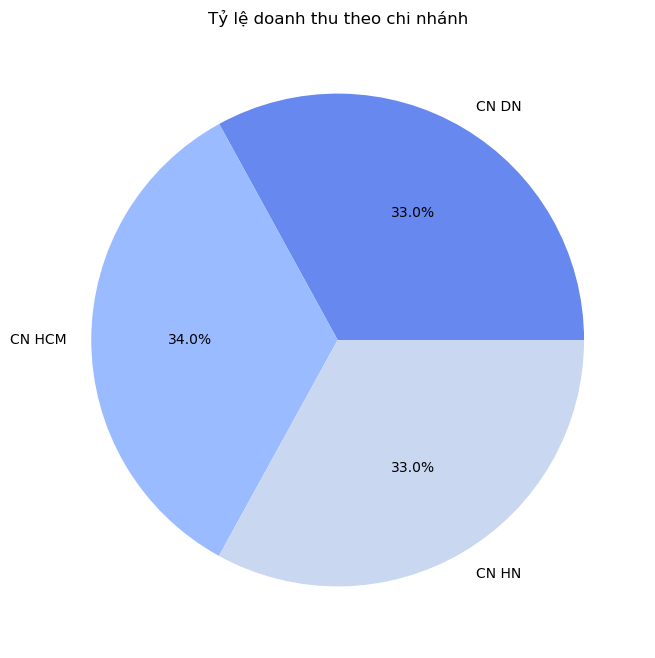

In [35]:
df_region = df_dulieusanpham_clean.groupby('Chi nhánh')['Doanh thu'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(df_region['Doanh thu'], labels=df_region['Chi nhánh'], autopct='%1.1f%%', colors=sns.color_palette('coolwarm'))
plt.title('Tỷ lệ doanh thu theo chi nhánh')
plt.show()


Tổng thể doanh thu sản phẩm có sự đồng đều giữa các chi nhánh. vậy nên ta sẽ chuyển qua quý để xem có sự khác biệt không

In [36]:
df_branch = df_dulieusanpham_clean.groupby([df_dulieusanpham_clean['Ngày hạch toán'].dt.to_period('M'), 'Chi nhánh'])[['Doanh thu', 'Lợi nhuận']].sum()
df_branch['Tỷ lệ lợi nhuận'] = df_branch['Lợi nhuận'] / df_branch['Doanh thu']
df_branch = df_branch.reset_index()
df_branch['Tháng'] = df_branch['Ngày hạch toán'].astype(str)
df_branch_quarterly = df_dulieusanpham_clean.groupby([df_dulieusanpham_clean['Ngày hạch toán'].dt.to_period('Q'), 'Chi nhánh'])[['Doanh thu', 'Lợi nhuận']].sum()
df_branch_quarterly['Tỷ lệ lợi nhuận'] = df_branch_quarterly['Lợi nhuận'] / df_branch_quarterly['Doanh thu']
df_branch_quarterly = df_branch_quarterly.reset_index()
df_branch_quarterly['Quý'] = df_branch_quarterly['Ngày hạch toán'].astype(str)


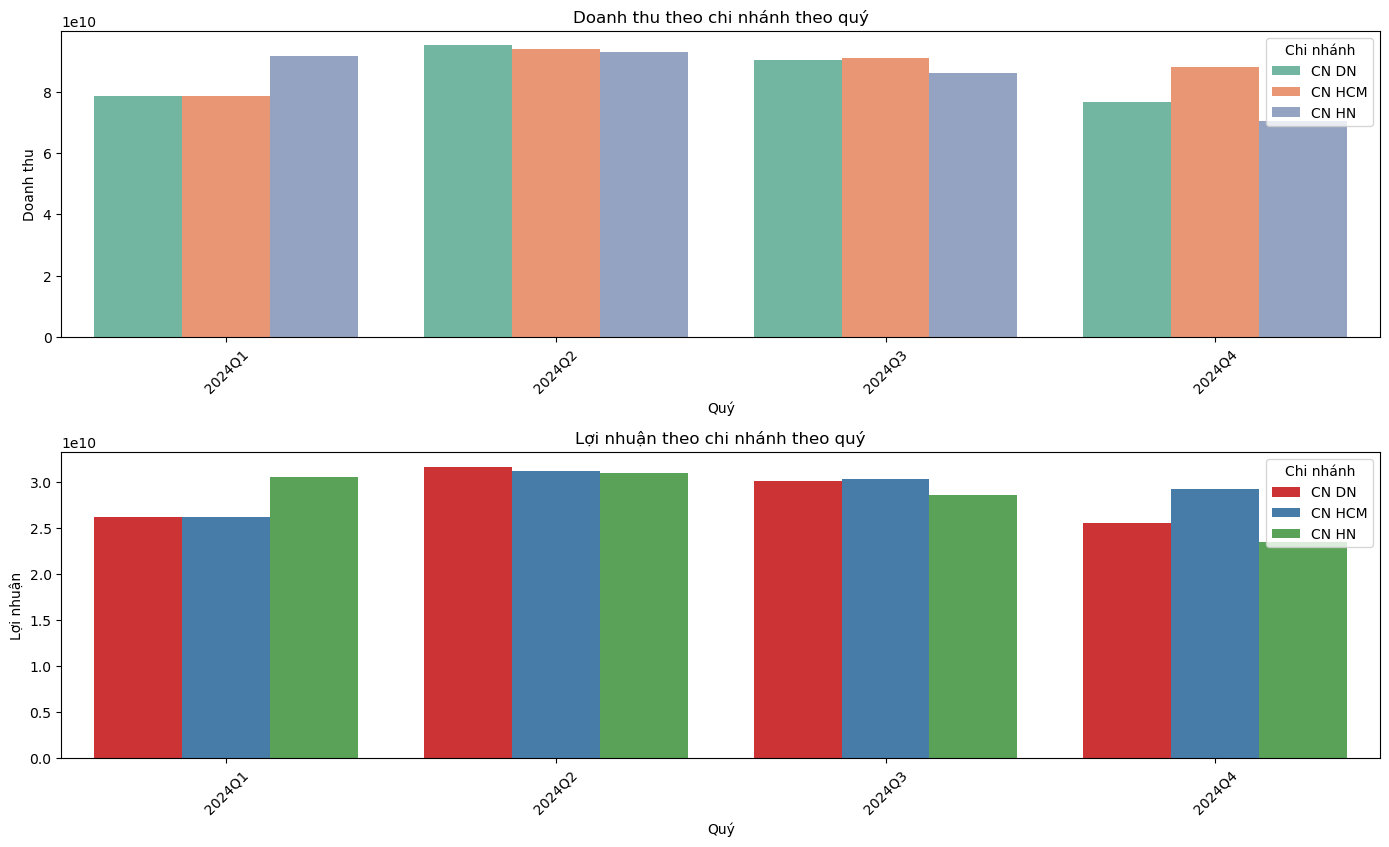

In [37]:
plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
sns.barplot(data=df_branch_quarterly, x='Quý', y='Doanh thu', hue='Chi nhánh', palette='Set2')
plt.title("Doanh thu theo chi nhánh theo quý")
plt.xlabel("Quý")
plt.ylabel("Doanh thu")
plt.xticks(rotation=45)
plt.legend(title="Chi nhánh")

plt.subplot(3, 1, 2)
sns.barplot(data=df_branch_quarterly, x='Quý', y='Lợi nhuận', hue='Chi nhánh', palette='Set1')
plt.title("Lợi nhuận theo chi nhánh theo quý")
plt.xlabel("Quý")
plt.ylabel("Lợi nhuận")
plt.xticks(rotation=45)
plt.legend(title="Chi nhánh")

plt.tight_layout()
plt.show()


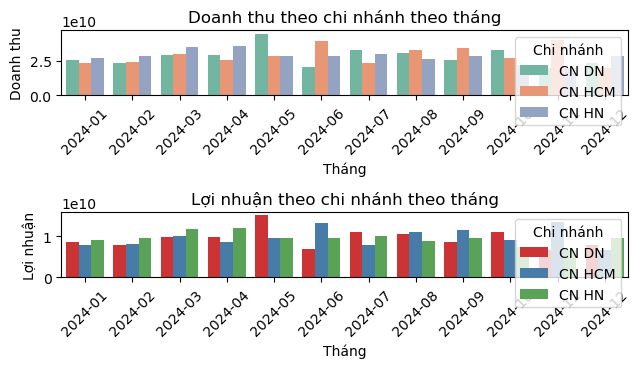

In [38]:
plt.subplot(3, 1, 1)
sns.barplot(data=df_branch, x='Tháng', y='Doanh thu', hue='Chi nhánh', palette='Set2')
plt.title("Doanh thu theo chi nhánh theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu")
plt.xticks(rotation=45)
plt.legend(title="Chi nhánh")

plt.subplot(3, 1, 2)
sns.barplot(data=df_branch, x='Tháng', y='Lợi nhuận', hue='Chi nhánh', palette='Set1')
plt.title("Lợi nhuận theo chi nhánh theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Lợi nhuận")
plt.xticks(rotation=45)
plt.legend(title="Chi nhánh")

plt.tight_layout()
plt.show()


In [39]:
df_sales= df_dulieusanpham_clean
df_products=df_sanpham

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\2162713311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales["Ngày hạch toán"] = pd.to_datetime(df_sales["Ngày hạch toán"])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\2162713311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales["Tháng"] = df_sales["Ngày hạch toán"].dt.to_period("M").astype(str)


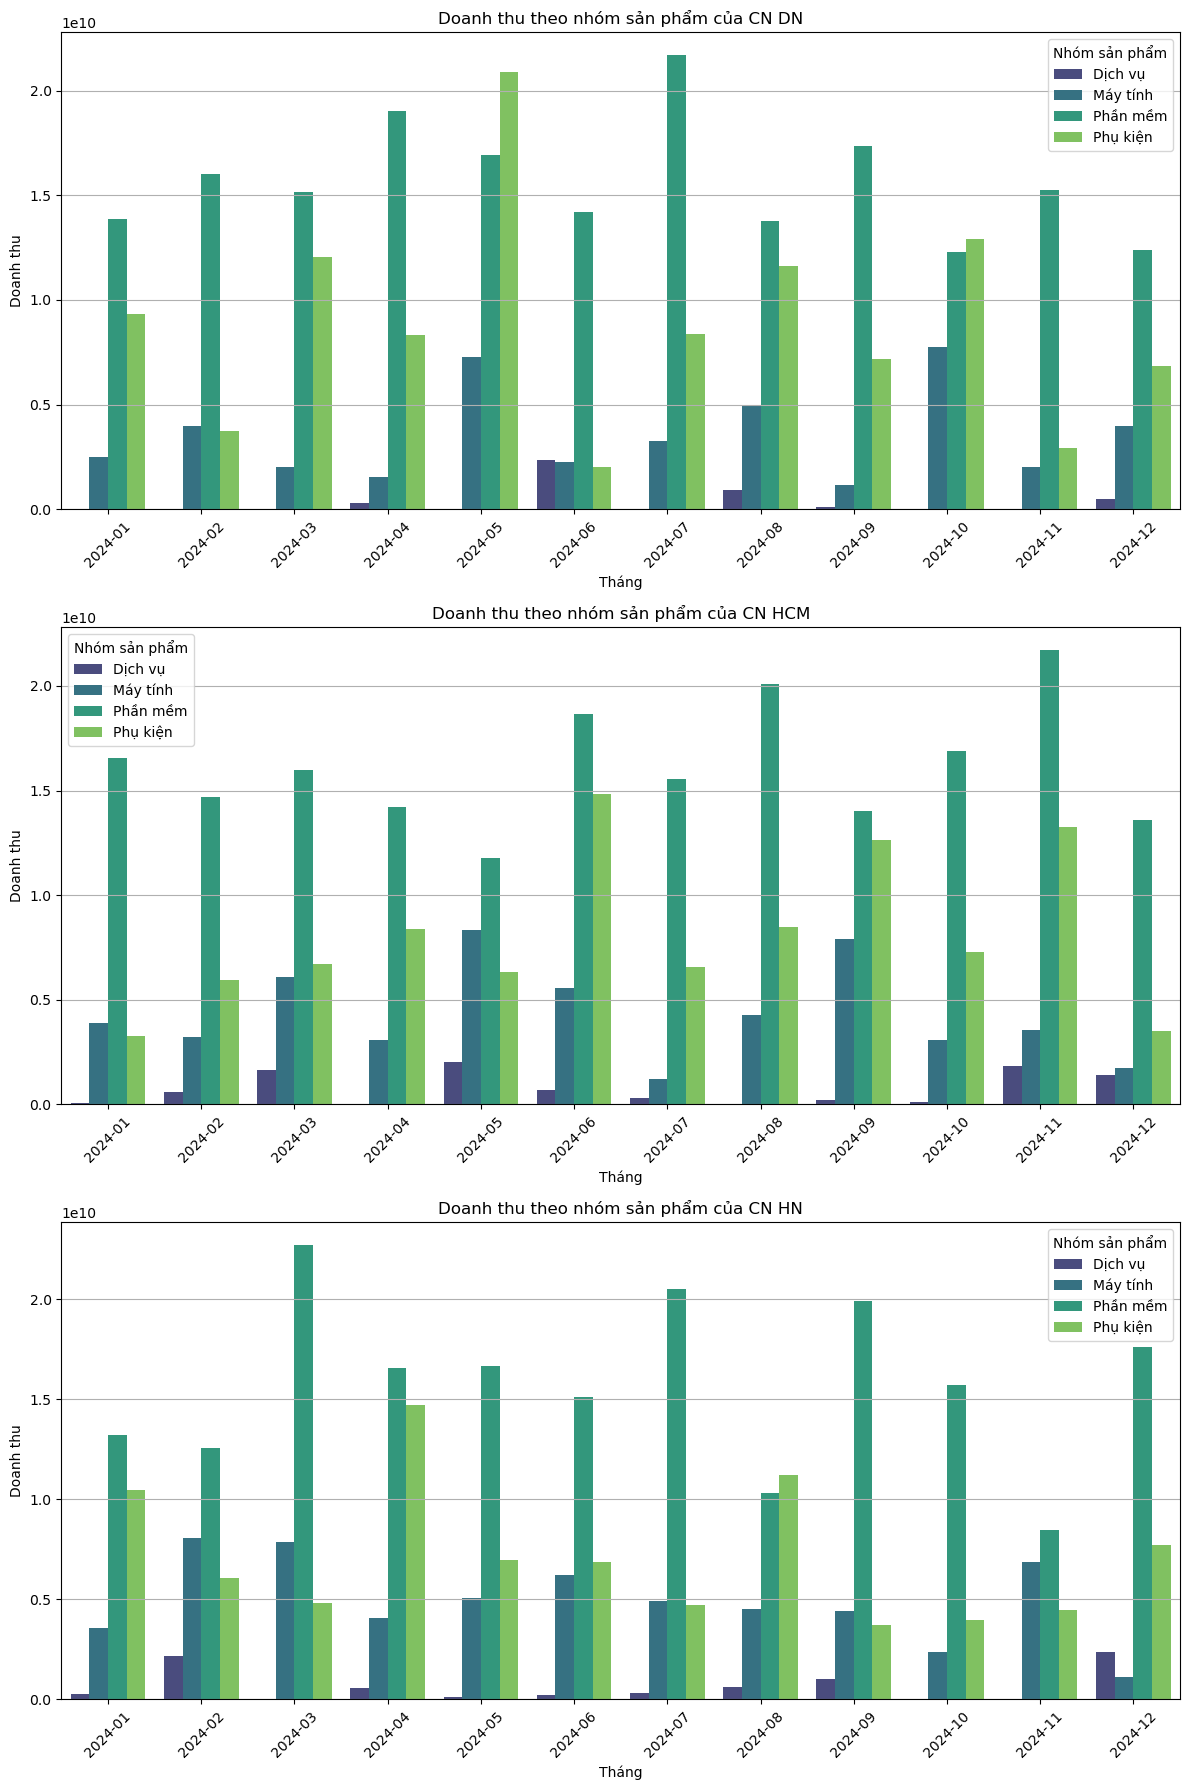

In [40]:
# Chuyển đổi cột ngày về dạng datetime
df_sales["Ngày hạch toán"] = pd.to_datetime(df_sales["Ngày hạch toán"])

# Thêm cột tháng
df_sales["Tháng"] = df_sales["Ngày hạch toán"].dt.to_period("M").astype(str)

# Đổi tên cột "Mã Sản phẩm" trong df_products để khớp với df_sales
df_products.rename(columns={"Mã Sản phẩm": "Mã Sản Phẩm"}, inplace=True)

# Gộp dữ liệu bán hàng với dữ liệu sản phẩm để lấy "Nhóm sản phẩm"
df_merged = df_sales.merge(df_products[["Mã Sản Phẩm", "Nhóm sản phẩm"]], on="Mã Sản Phẩm", how="left")

# Gộp doanh thu theo tháng, chi nhánh và nhóm sản phẩm
df_grouped = df_merged.groupby(["Tháng", "Chi nhánh", "Nhóm sản phẩm_x"]) \
    ["Doanh thu"].sum().reset_index()

# Lấy danh sách các chi nhánh
chi_nhanh_list = df_grouped["Chi nhánh"].unique()

# Vẽ biểu đồ barplot
plt.figure(figsize=(12, 6 * len(chi_nhanh_list)))
palette = "viridis"  # Chọn bảng màu

for i, cn in enumerate(chi_nhanh_list, 1):
    plt.subplot(len(chi_nhanh_list), 1, i)
    df_cn = df_grouped[df_grouped["Chi nhánh"] == cn]
    sns.barplot(data=df_cn, x="Tháng", y="Doanh thu", hue="Nhóm sản phẩm_x", palette=palette)
    plt.title(f"Doanh thu theo nhóm sản phẩm của {cn}")
    plt.xlabel("Tháng")
    plt.ylabel("Doanh thu")
    plt.xticks(rotation=45)
    plt.legend(title="Nhóm sản phẩm")
    plt.grid(axis="y")

plt.tight_layout()
plt.show()

In [41]:
df_revenue = df_merged.groupby(["Chi nhánh", "Nhóm sản phẩm_x"])["Doanh thu"].sum().reset_index()
df_revenue

,Chi nhánh,Nhóm sản phẩm_x,Doanh thu
0,CN DN,Dịch vụ,4160415000
1,CN DN,Máy tính,42731220000
2,CN DN,Phần mềm,187957035000
3,CN DN,Phụ kiện,106230585000
4,CN HCM,Dịch vụ,8840625000
5,CN HCM,Máy tính,51933825000
6,CN HCM,Phần mềm,193780515000
7,CN HCM,Phụ kiện,97194855000
8,CN HN,Dịch vụ,7539975000
9,CN HN,Máy tính,58927185000


CN HCM: 8,8 tỷ VNĐ (cao nhất)

CN HN: 7,5 tỷ VNĐ

CN DN: 4,2 tỷ VNĐ (thấp nhất)

Nhận xét: Dịch vụ đóng góp rất ít vào tổng doanh thu tại tất cả các chi nhánh, và CN HCM có doanh thu cao hơn, có thể do thị trường HCM có nhu cầu lớn hơn về dịch vụ kỹ thuật hoặc bảo hành.

CN HN: 58,9 tỷ VNĐ (cao nhất)

CN HCM: 51,9 tỷ VNĐ

CN DN: 42,7 tỷ VNĐ (thấp nhất)

Nhận xét: Hà Nội dẫn đầu về doanh thu máy tính, phản ánh nhu cầu cao tại khu vực này, có thể do nhiều doanh nghiệp và trường học tại đây. Đà Nẵng có doanh thu thấp nhất, phù hợp với quy mô thị trường nhỏ hơn.

CN HCM: 193,8 tỷ VNĐ (cao nhất)

CN HN: 189,3 tỷ VNĐ

CN DN: 188 tỷ VNĐ (thấp nhất, nhưng chênh lệch không đáng kể)

Nhận xét: Phần mềm là nhóm sản phẩm chủ lực, và doanh thu khá đồng đều giữa các chi nhánh, với CN HCM dẫn đầu nhẹ. Điều này cho thấy phần mềm có nhu cầu ổn định trên toàn quốc, nhưng HCM có thể phục vụ nhiều khách hàng doanh nghiệp hơn.

CN DN: 106,2 tỷ VNĐ (cao nhất)

CN HCM: 97,2 tỷ VNĐ

CN HN: 85,6 tỷ VNĐ (thấp nhất)

Nhận xét: Đà Nẵng bất ngờ dẫn đầu về doanh thu phụ kiện, trái ngược với xu hướng tổng doanh thu thấp hơn của chi nhánh này. Điều này có thể do:
Nhu cầu phụ kiện tại Đà Nẵng cao hơn dự kiến (ví dụ: phục vụ du lịch, công việc từ xa, hoặc người dùng cá nhân).
Chiến lược tập trung vào phụ kiện tại CN DN, trong khi CN HN và CN HCM tập trung vào các nhóm khác.

HCM mạnh về Phần mềm và dịch vụ

HN mạnh về máy tính

ĐN mạnh về phụ kiện

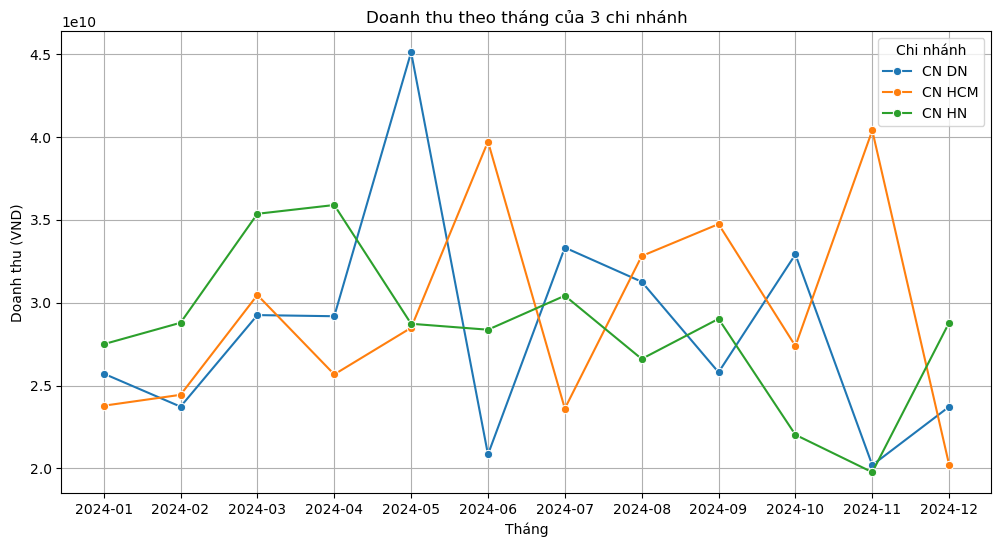

In [42]:
df_revenue_m = df_merged.groupby(["Chi nhánh","Tháng"])["Doanh thu"].sum().reset_index()
df_revenue_m

plt.figure(figsize=(12,6))
sns.lineplot(data=df_revenue_m,x="Tháng",y="Doanh thu",hue="Chi nhánh", marker="o")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu (VND)")
plt.title("Doanh thu theo tháng của 3 chi nhánh")
plt.legend(title="Chi nhánh")
plt.grid(True)

Thông qua biểu đồ doanh thu theo nhóm sản phẩm của các chi nhánh có thể đưa ra 1 số nhận xét như sau:

thời điểm có sự khác biệt: tháng 5, 6 và 11

Chi nhánh Đà Nẵng: xu hướng chung thì phần mềm đem lại nhiều doanh thu hơn, tuy nhiên trong tháng 5, chúng ta thấy có sự tiến lên vượt bậc của doanh thu kiện , gấp đôi tháng doanh thu phụ kiện tháng trước và vượt lên cả phần mềm rồi lại tụt xuống hẳn trong tháng 6 - 1 trong 2 tháng có doanh thu thấp nhất ( 11)

Chi nhánh HCM: ngược lại Đà Nẵng, HCM tháng 6 lại là 1 trong 2 tháng có doanh thu cao nhất ( 11)

2 câu hỏi: tại sao lại có sự khác biệt ở 2 chi nhánh này? giữa 2 chi nhánh có sự ảnh hưởng gì tới nhau không? 

xu hướng tiêu thụ sản phẩm của các chi nhánh?


việc giảm mạnh ngay sau khi đạt đỉnh có thể do giảm nhu cầu hoặc do vào kỳ hè ( đây là thời điểm du lịch phát triển mạnh và Đà Nẵng rất phát triển về mảng này)

# outside :v

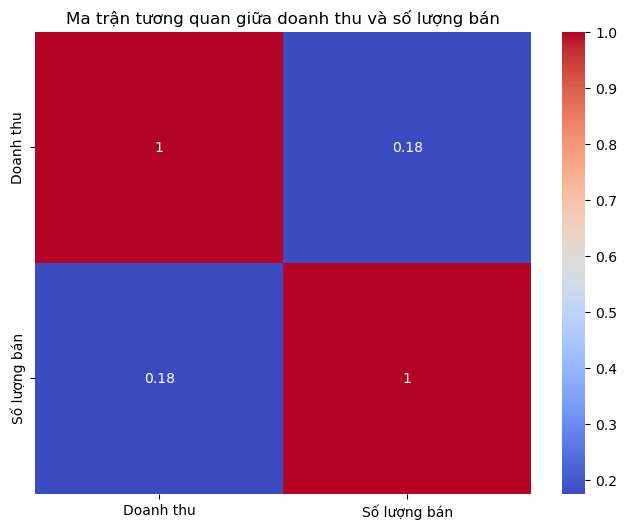

In [43]:
df_correlation = df_dulieusanpham_clean.pivot_table(index='Sản phẩm', values=['Doanh thu', 'Số lượng bán'], aggfunc='sum').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlation, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa doanh thu và số lượng bán')
plt.show()


# xu hướng mua hàng theo ngày trong tuần

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\3805793438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dulieusanpham_clean['Ngày trong tuần'] = df_dulieusanpham_clean['Ngày hạch toán'].dt.day_name()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\3805793438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ngày trong tuần', y='Doanh thu', data=df_weekday, palette='pastel')


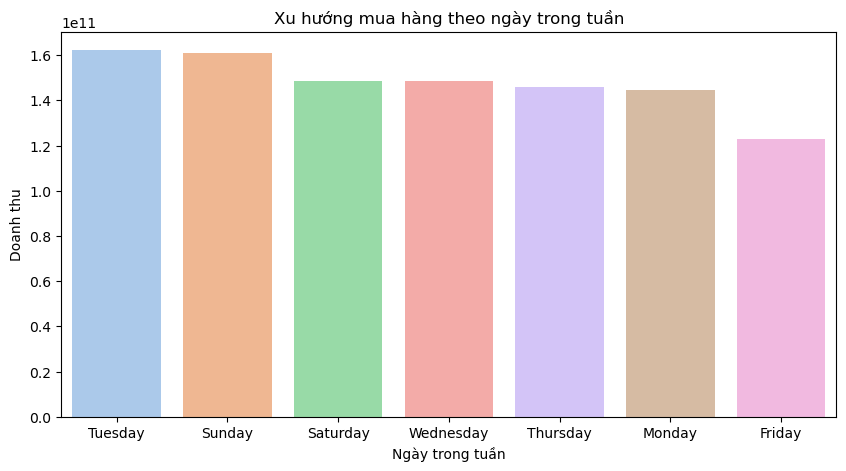

In [44]:
df_dulieusanpham_clean['Ngày trong tuần'] = df_dulieusanpham_clean['Ngày hạch toán'].dt.day_name()
df_weekday = df_dulieusanpham_clean.groupby('Ngày trong tuần')['Doanh thu'].sum().reset_index()
df_weekday = df_weekday.sort_values(by='Doanh thu', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Ngày trong tuần', y='Doanh thu', data=df_weekday, palette='pastel')
plt.title('Xu hướng mua hàng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Doanh thu')
plt.show()


Xu hướng mua hàng tập trung vào thứ 3 và chủ nhật

Thứ 6 là thời điểm mua hàng ít nhất trong tuần

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\2996518189.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_weekday.index, y=avg_revenue_by_weekday.values, palette="magma")


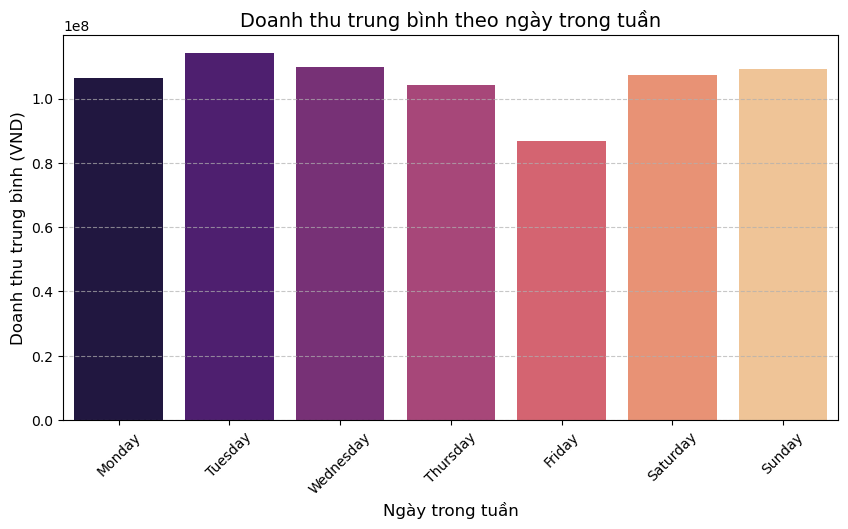

In [45]:
avg_revenue_by_weekday = df_sales.groupby("Ngày trong tuần")["Doanh thu"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

avg_revenue_by_weekday
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_revenue_by_weekday.index, y=avg_revenue_by_weekday.values, palette="magma")

plt.title("Doanh thu trung bình theo ngày trong tuần", fontsize=14)
plt.xlabel("Ngày trong tuần", fontsize=12)
plt.ylabel("Doanh thu trung bình (VND)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


# những sản phẩm tạo 80% doanh thu

In [46]:
df_doanh_thu['Cumulative %'] = df_doanh_thu['Doanh thu'].cumsum() / df_doanh_thu['Doanh thu'].sum() * 100
df_doanh_thu

,Sản phẩm,Doanh thu,Cumulative %
695,Thiết bị lưu trữ HP 3PAR StoreServ B200 2N Fld...,56809350000,5.493402
166,Máy tính chủ HP DL380 G9 CTO E5-2660v3(2.6GHz/...,40629150000,9.422196
703,Thiết bị vi tính tường lửa hiệu Palo Alto: Pal...,35128770000,12.819110
164,Máy tính chủ HP DL 380 G9 CTO E5-2660V3(2.6GHz...,34906950000,16.194574
610,Phần mềm VMware vSphere 6 Standard Acceleratio...,32241510000,19.312293
...,...,...,...
543,Phần mềm SYMC ENDPOINT PROTECTION 14 PER USER ...,3600000,99.999089
65,"Chuột máy tính Genuis RS, DX-120, USB, chiếc. ...",3150000,99.999394
64,"Chuột máy tính Genius DX 110X, Black USB",2700000,99.999655
760,Đầu nối dây cáp mạng máy vi tính (P/N: 6-21119...,2400000,99.999887


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\1391908972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sản phẩm', x='Doanh thu', data=df_doanh_thu.head(10), palette='Blues')


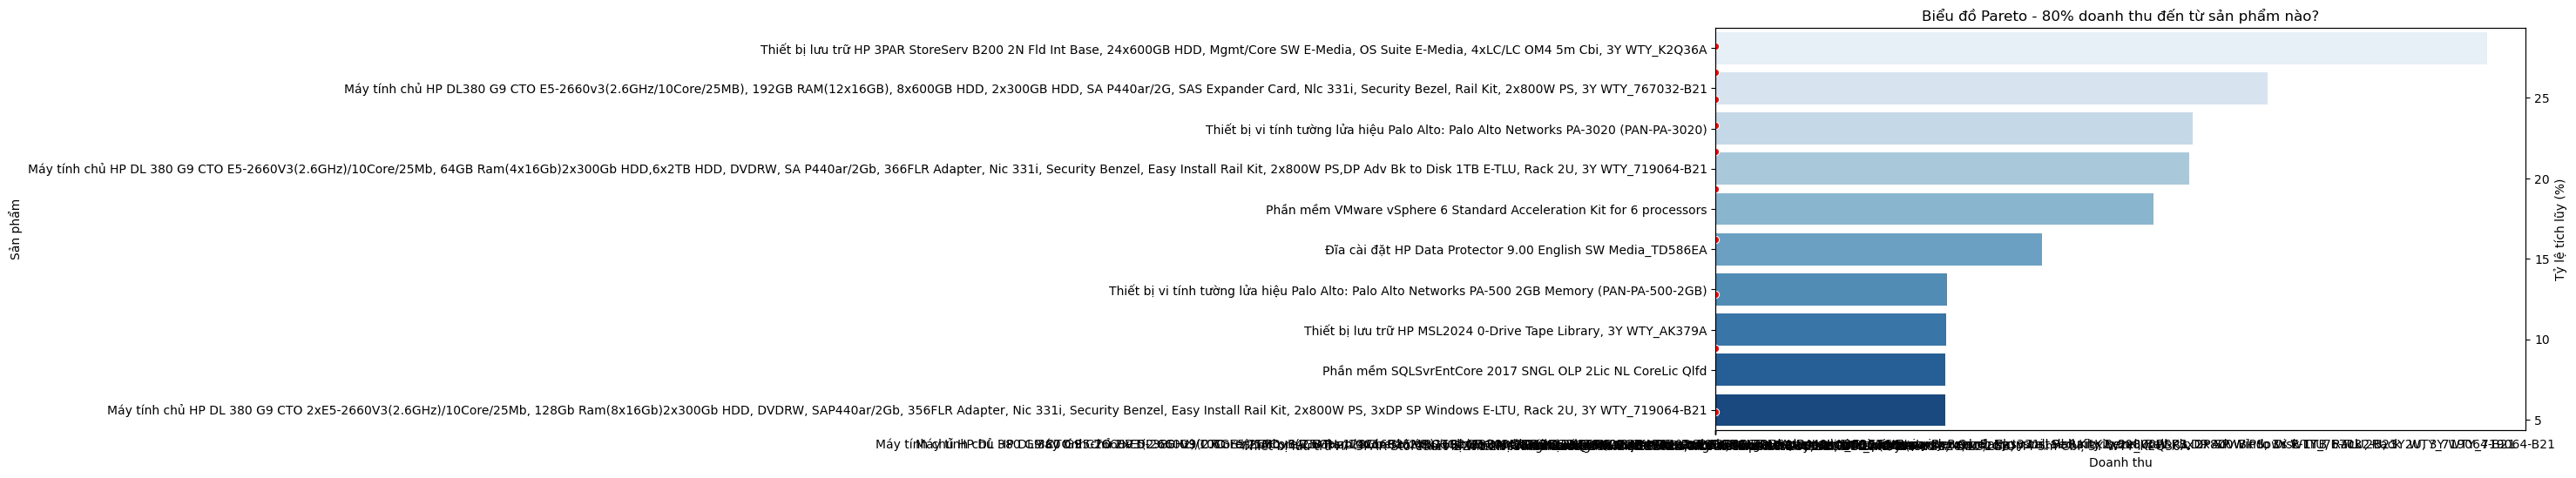

In [47]:
df_doanh_thu['Cumulative %'] = df_doanh_thu['Doanh thu'].cumsum() / df_doanh_thu['Doanh thu'].sum() * 100
plt.figure(figsize=(12, 6))
sns.barplot(y='Sản phẩm', x='Doanh thu', data=df_doanh_thu.head(10), palette='Blues')
plt.ylabel('Sản phẩm')
plt.xlabel('Doanh thu')
plt.title('Biểu đồ Pareto - 80% doanh thu đến từ sản phẩm nào?')
plt.twinx()
sns.lineplot(y=df_doanh_thu['Cumulative %'].head(10), x=df_doanh_thu['Sản phẩm'].head(10), color='r', marker='o')
plt.ylabel('Tỷ lệ tích lũy (%)')
plt.show()


In [48]:
product_revenue = df_sales.groupby("Mã Sản Phẩm")["Doanh thu"].sum().reset_index()
product_revenue = product_revenue.sort_values(by="Doanh thu", ascending=False)
total_revenue = product_revenue["Doanh thu"].sum()
product_revenue["Tỷ lệ tích lũy"] = product_revenue["Doanh thu"].cumsum() / total_revenue

In [49]:
top_80_products = product_revenue[product_revenue["Tỷ lệ tích lũy"] <= 0.80]
top_80_products.shape[0], top_80_products.head()

(158,
     Mã Sản Phẩm    Doanh thu  Tỷ lệ tích lũy
 147       P-151  56809350000        0.054934
 153       P-160  40629150000        0.094222
 146       P-147  35128770000        0.128191
 152       P-159  34906950000        0.161946
 209       P-218  32241510000        0.193123)

Có 158 sản phẩm tạo ra 80% doanh thu 

In [50]:
#top_80_products.to_excel("top_80_products.xlsx",index=False)

In [51]:
df_products.rename(columns={"Mã Sản phẩm": "Mã Sản Phẩm"}, inplace=True)
top_80_merged = top_80_products.merge(df_products[["Mã Sản Phẩm", "Nhóm sản phẩm"]], on="Mã Sản Phẩm", how="left")
group_revenue = top_80_merged.groupby("Nhóm sản phẩm")["Doanh thu"].sum()

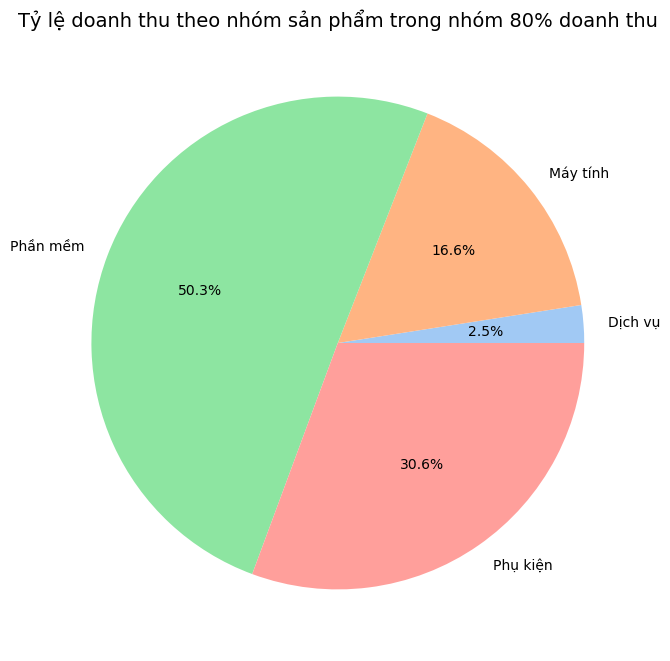

In [52]:
plt.figure(figsize=(8, 8))
plt.pie(group_revenue, labels=group_revenue.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Tỷ lệ doanh thu theo nhóm sản phẩm trong nhóm 80% doanh thu", fontsize=14)
plt.show()

Trong 158 sản phẩm tạo ra 80% doanh thu có 1 nửa là từ phần mềm, 30% từ phụ kiện, 16.6% máy tính và 2.5% dịch vụ

# SP lợi nhuận cao doanh số thấp và sp lợi nhuận thấp doanh số cao :v

In [53]:
df_merged = df_dulieusanpham_clean.merge(df_sanpham, how="left", left_on="Mã Sản Phẩm", right_on="Mã Sản Phẩm")
df_merged["Lợi nhuận"] = df_merged["Doanh thu"] - df_merged["Giá vốn hàng hóa"]
df_summary = df_merged.groupby(["Mã Sản Phẩm", "Sản phẩm_x"]).agg(
    Tổng_doanh_số=("Số lượng bán", "sum"),
    Tổng_doanh_thu=("Doanh thu", "sum"),
    Tổng_lợi_nhuận=("Lợi nhuận", "sum")
).reset_index()

In [54]:
quantile_doanh_so = df_summary["Tổng_doanh_số"].quantile(0.8)  
quantile_loi_nhuan = df_summary["Tổng_lợi_nhuận"].quantile(0.2)  
sp_ban_chay_loi_nhuan_thap = df_summary[
    (df_summary["Tổng_doanh_số"] >= quantile_doanh_so) & 
    (df_summary["Tổng_lợi_nhuận"] <= quantile_loi_nhuan)
]

In [55]:
quantile_loi_nhuan_cao = df_summary["Tổng_lợi_nhuận"].quantile(0.8)  
quantile_doanh_so_thap = df_summary["Tổng_doanh_số"].quantile(0.2)  
sp_loi_nhuan_cao_doanh_so_thap = df_summary[
    (df_summary["Tổng_lợi_nhuận"] >= quantile_loi_nhuan_cao) & 
    (df_summary["Tổng_doanh_số"] <= quantile_doanh_so_thap)
]

In [56]:
#sp_khach_hang_quay_lai = sp_khach_hang_quay_lai.groupby("Mã Sản Phẩm").size().reset_index(name="Số khách hàng quay lại")

In [57]:
sp_ban_chay_loi_nhuan_thap

,Mã Sản Phẩm,Sản phẩm_x,Tổng_doanh_số,Tổng_doanh_thu,Tổng_lợi_nhuận
100,P-101,Bản quyền phần mềm máy tính Kaspesky KIS MD ch...,105,56700000,18900000
103,P-104,Phần mềm diệt Virus Norton Internet Security ...,89,13350000,4450000
228,P-237,Bàn phím Dell KB216B USB,131,25545000,8515000
243,P-252,Đăng ký tên miền,91,21840000,7280000
250,P-259,Bản quyền phần mềm Kaspesky Anti Virus cho 1 m...,105,20475000,6825000
286,P-296,Vỏ máy tính Hantkey HT-055,99,23760000,7920000
405,P-416,Chuột không dây Dell WM123 (WM123),95,17100000,5700000
464,P-475,Phần mềm NIS2014-1U (NIS2014-1U),91,13650000,4550000
499,P-510,Nguồn máy tính Hantkey HT-500,91,24570000,8190000
532,P-547,Phần mềm Gsuite basic 6 Month,94,29610000,9870000


In [58]:
#sp_ban_chay_loi_nhuan_thap.to_excel("sp_ban_chay_loi_nhuan_thap.xlsx",index=False)

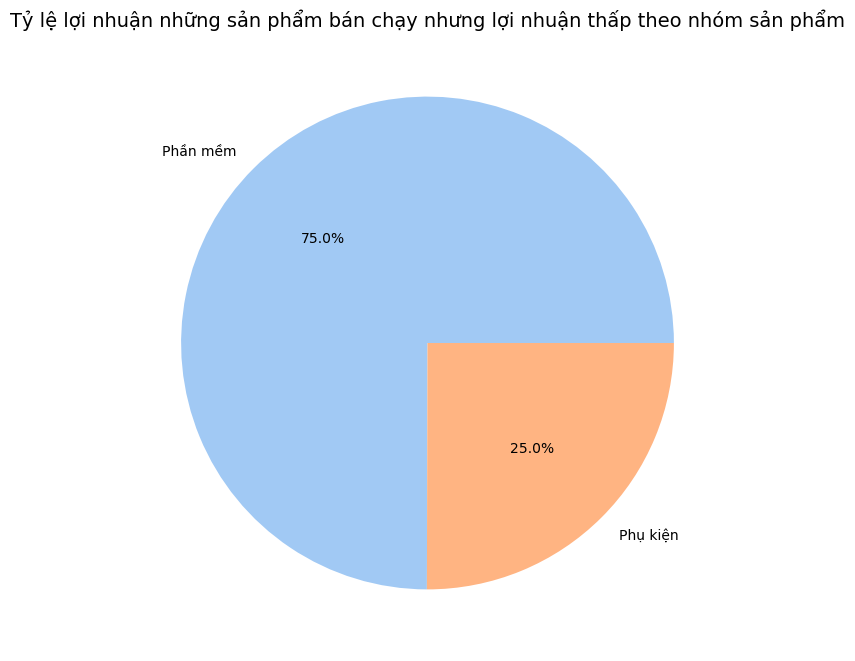

In [59]:
sp_ban_chay_loi_nhuan_thap = sp_ban_chay_loi_nhuan_thap.merge(
    df_products[["Mã Sản Phẩm", "Nhóm sản phẩm"]], on="Mã Sản Phẩm", how="left"
)
profit_by_category = sp_ban_chay_loi_nhuan_thap.groupby("Nhóm sản phẩm")["Tổng_lợi_nhuận"].sum()
plt.figure(figsize=(8, 8))
plt.pie(profit_by_category, labels=profit_by_category.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Tỷ lệ lợi nhuận những sản phẩm bán chạy nhưng lợi nhuận thấp theo nhóm sản phẩm", fontsize=14)
plt.show()


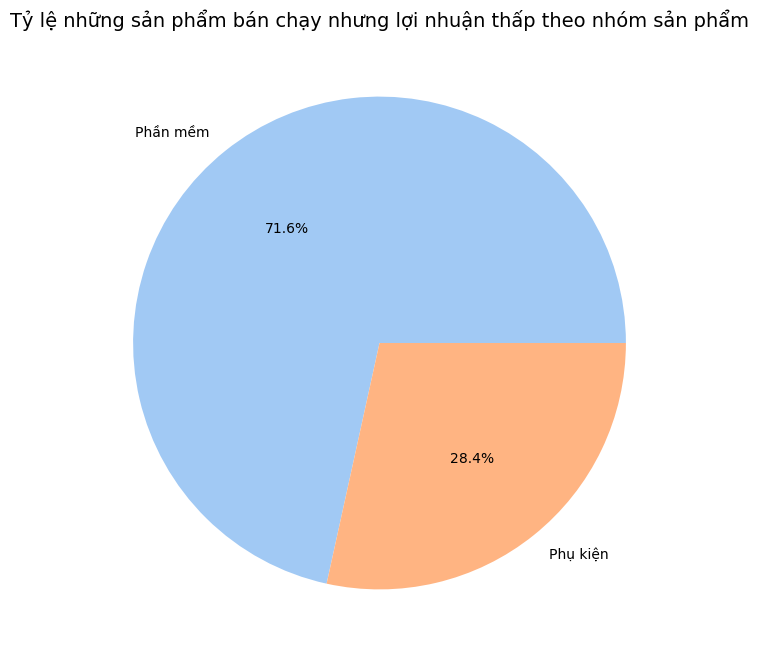

In [60]:
profit_by_category = sp_ban_chay_loi_nhuan_thap.groupby("Nhóm sản phẩm")["Tổng_doanh_số"].sum()
plt.figure(figsize=(8, 8))
plt.pie(profit_by_category, labels=profit_by_category.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Tỷ lệ những sản phẩm bán chạy nhưng lợi nhuận thấp theo nhóm sản phẩm", fontsize=14)
plt.show()

trong nhóm sản phẩm bán chạy nhưng lợi nhuận thấp hơn 80% sản phẩm khác thì 75% là phầm mềm, 25% là phụ kiện

In [61]:
# box plot và IQR để check

In [62]:
sp_loi_nhuan_cao_doanh_so_thap

,Mã Sản Phẩm,Sản phẩm_x,Tổng_doanh_số,Tổng_doanh_thu,Tổng_lợi_nhuận
1,P-002,Phần mềm TeamViewer 12 Corporate,45,1853550000,617850000
65,P-066,"phần mềm Minitab 18 Full Version, Single-User ...",45,1601775000,533925000
170,P-179,phần mềm Fortigate 200D - UTM Bundle (8x5 Fort...,51,1731195000,577065000
224,P-233,Phần mềm SQLSvrStdCore 2017 SNGL OLP 2Lic NL C...,44,2985840000,995280000
226,P-235,Máy chủ Dell PowerEdge T330 8x3.5/E3-1220 v6/ ...,50,1597500000,532500000
236,P-245,Phần mềm SecurityGateway for Email Servers 200...,27,1471365000,490455000
248,P-257,Phần mềm SecurityGateway Annual License 1100 t...,37,1696080000,565360000
349,P-360,Gia Hạn dịch vụ bảo trì thiết bị Renewal Citri...,50,11748750000,3916250000
381,P-392,Phần mềm Red Hat Enterprise Linux Server Premi...,47,1579200000,526400000
427,P-438,"Máy tính xách tay Lenovo ThinkPad T470s, i7-76...",50,1458000000,486000000


In [63]:
sp_loi_nhuan_cao_doanh_so_thap.to_excel("sp_loi_nhuan_cao_doanh_so_thap.xlsx",index=False)

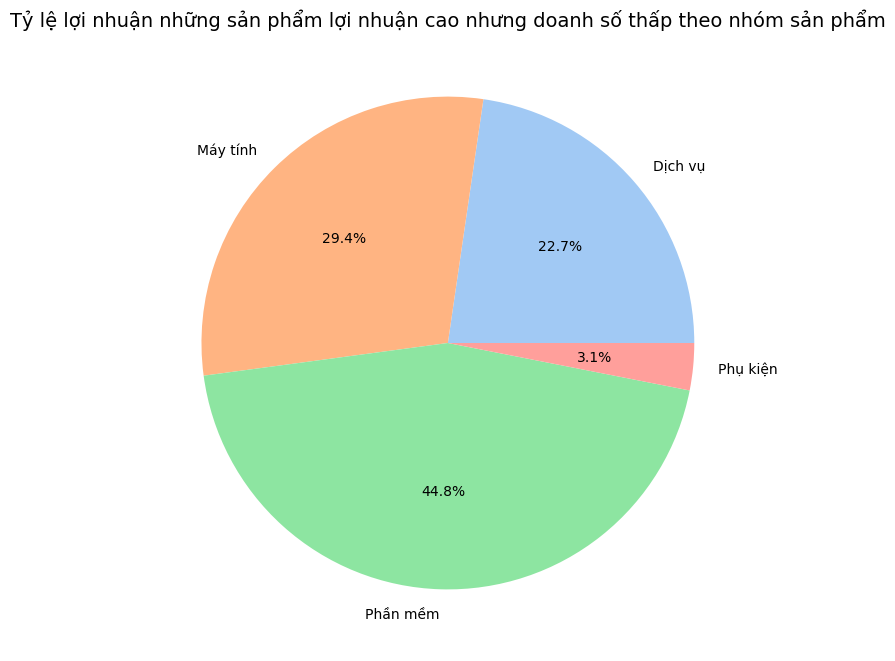

In [64]:
sp_loi_nhuan_cao_doanh_so_thap = sp_loi_nhuan_cao_doanh_so_thap.merge(
    df_products[["Mã Sản Phẩm", "Nhóm sản phẩm"]], on="Mã Sản Phẩm", how="left"
)
profit_by_category = sp_loi_nhuan_cao_doanh_so_thap.groupby("Nhóm sản phẩm")["Tổng_lợi_nhuận"].sum()
plt.figure(figsize=(8, 8))
plt.pie(profit_by_category, labels=profit_by_category.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Tỷ lệ lợi nhuận những sản phẩm lợi nhuận cao nhưng doanh số thấp theo nhóm sản phẩm", fontsize=14)
plt.show()

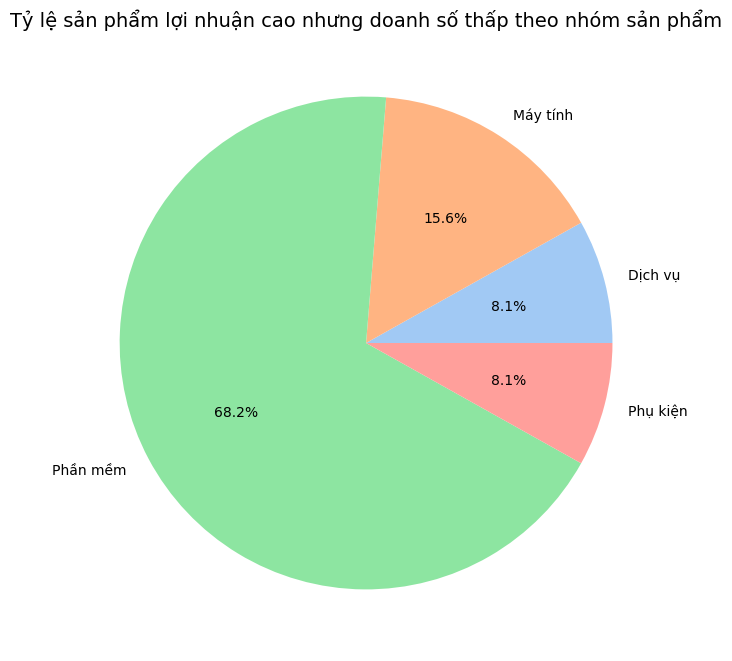

In [65]:
profit_by_category = sp_loi_nhuan_cao_doanh_so_thap.groupby("Nhóm sản phẩm")["Tổng_doanh_số"].sum()
plt.figure(figsize=(8, 8))
plt.pie(profit_by_category, labels=profit_by_category.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Tỷ lệ sản phẩm lợi nhuận cao nhưng doanh số thấp theo nhóm sản phẩm", fontsize=14)
plt.show()

trong nhóm những sản phẩm có lợi nhuận cao nhưng doanh số thấp, phần mềm chiếm 45%, máy tính chiếm 30%, dịch vụ chiếm 23%, phụ kiện chiếm 3% 

có thể thấy qua 2 biểu đồ, công ty nên tận dụng nhóm lợi nhuận cao nhưng doanh số thấp cụ thể là máy tính và phần mềm, đồng thời tối ưu nhóm bán chạy nhưng lợi nhuận thấp. Nhóm dịch vụ cũng nên đc tập trung hơn

máy tính tạo danh thu tốt nhưng doanh số không k cao, có thể do giá cao, thị trường hoặc chu kỳ mua hàng dài

# khách hàng quay lại

In [66]:
df_sales_cleaned = df_sales[["Mã KH", "Mã Sản Phẩm", "Số lượng bán"]].copy()
df_repeat_customers = df_sales_cleaned.groupby(["Mã KH", "Mã Sản Phẩm"]).sum().reset_index()
df_repeat_customers.rename(columns={"Số lượng bán": "Số lần mua"}, inplace=True)
sp_khach_hang_quay_lai = df_repeat_customers[df_repeat_customers["Số lần mua"] > 1]
df_repeat_customers.head()

,Mã KH,Mã Sản Phẩm,Số lần mua
0,KH-0001,P-006,5
1,KH-0001,P-146,9
2,KH-0001,P-147,8
3,KH-0001,P-256,10
4,KH-0001,P-297,3


In [67]:
total_customers = df_repeat_customers["Mã KH"].nunique()  # Tổng số khách hàng
repeat_customers = sp_khach_hang_quay_lai["Mã KH"].nunique()  # Số khách hàng mua lại
repeat_rate = repeat_customers / total_customers * 100  # Tỷ lệ khách hàng mua lại
avg_repeat_purchase = sp_khach_hang_quay_lai["Số lần mua"].mean()  # Trung bình số lần mua lại

In [68]:
summary = {
    "Tổng số khách hàng": total_customers,
    "Số khách hàng mua lại": repeat_customers,
    "Tỷ lệ khách hàng mua lại (%)": round(repeat_rate, 2),
    "Trung bình số lần mua lại": round(avg_repeat_purchase, 2),
}
summary

{'Tổng số khách hàng': 786,
 'Số khách hàng mua lại': 786,
 'Tỷ lệ khách hàng mua lại (%)': 100.0,
 'Trung bình số lần mua lại': 6.05}

In [69]:
def categorize_customers(x):
    if x == 1:
        return "Mua 1 lần"
    elif x <= 3:
        return "Mua 2-3 lần"
    else:
        return "Mua >3 lần"

df_repeat_customers["Nhóm khách hàng"] = df_repeat_customers["Số lần mua"].apply(categorize_customers)


In [70]:
df_repeat_customers

,Mã KH,Mã Sản Phẩm,Số lần mua,Nhóm khách hàng
0,KH-0001,P-006,5,Mua >3 lần
1,KH-0001,P-146,9,Mua >3 lần
2,KH-0001,P-147,8,Mua >3 lần
3,KH-0001,P-256,10,Mua >3 lần
4,KH-0001,P-297,3,Mua 2-3 lần
...,...,...,...,...
9727,KH-0786,P-611,4,Mua >3 lần
9728,KH-0786,P-754,3,Mua 2-3 lần
9729,KH-0786,P-765,4,Mua >3 lần
9730,KH-0786,P-766,1,Mua 1 lần


In [71]:
customer_segments = df_repeat_customers.groupby("Nhóm khách hàng")["Mã KH"].nunique()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\3537936556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_segments.index, y=customer_segments.values, palette="Blues_r")


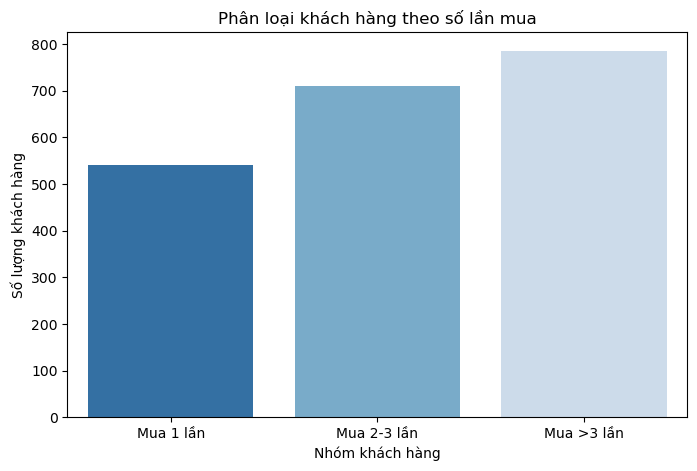

In [72]:
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_segments.index, y=customer_segments.values, palette="Blues_r")
plt.xlabel("Nhóm khách hàng")
plt.ylabel("Số lượng khách hàng")
plt.title("Phân loại khách hàng theo số lần mua")
plt.show()

In [73]:
customer_segments

Nhóm khách hàng
Mua 1 lần      540
Mua 2-3 lần    710
Mua >3 lần     786
Name: Mã KH, dtype: int64

có tới  786 khách hàng quay lại hơn 3 lần, chứng tỏ cty đang làm tốt việc giữ chân khách hàng

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\494339666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")


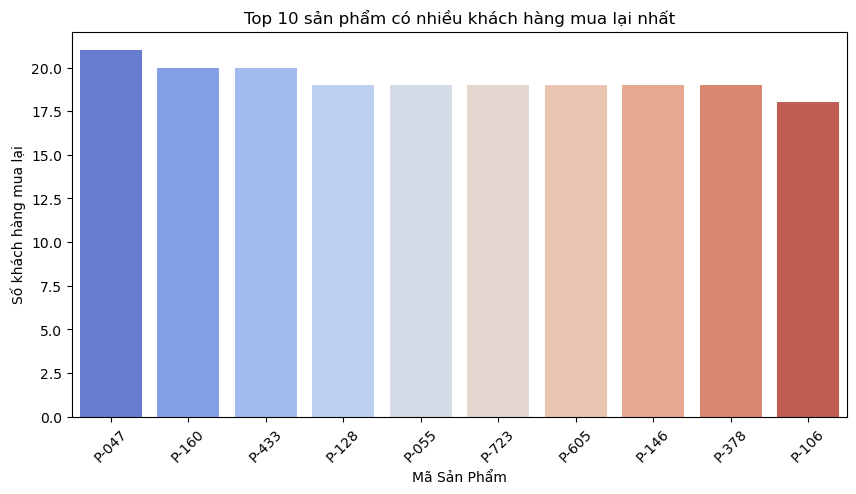

Top 10 sản phẩm được khách hàng quay lại mua nhiều nhất:
Mã Sản Phẩm
P-047    21
P-160    20
P-433    20
P-128    19
P-055    19
P-723    19
P-605    19
P-146    19
P-378    19
P-106    18
Name: Mã KH, dtype: int64


In [74]:
top_products = sp_khach_hang_quay_lai.groupby("Mã Sản Phẩm")["Mã KH"].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")
plt.xlabel("Mã Sản Phẩm")
plt.ylabel("Số khách hàng mua lại")
plt.title("Top 10 sản phẩm có nhiều khách hàng mua lại nhất")
plt.xticks(rotation=45)
plt.show()
top_products
top_products = sp_khach_hang_quay_lai.groupby("Mã Sản Phẩm")["Mã KH"].nunique().sort_values(ascending=False).head(10)

print("Top 10 sản phẩm được khách hàng quay lại mua nhiều nhất:")
print(top_products)

Những sản phẩm này có thể thuộc nhóm sản phẩm chủ lực hoặc có độ hài lòng cao, nên khách hàng có xu hướng quay lại mua

In [75]:
top_products = top_products.reset_index()
top_products = top_products.merge(
    df_products[["Mã Sản Phẩm", "Nhóm sản phẩm"]], on="Mã Sản Phẩm", how="left"
)
top_products

,Mã Sản Phẩm,Mã KH,Nhóm sản phẩm
0,P-047,21,Phần mềm
1,P-160,20,Máy tính
2,P-433,20,Phần mềm
3,P-128,19,Phần mềm
4,P-055,19,Phần mềm
5,P-723,19,Phần mềm
6,P-605,19,Phụ kiện
7,P-146,19,Phần mềm
8,P-378,19,Phụ kiện
9,P-106,18,Phần mềm


In [76]:
# Chuyển đổi cột ngày về định dạng datetime
df_sales["Ngày hạch toán"] = pd.to_datetime(df_sales["Ngày hạch toán"])

# Sắp xếp theo khách hàng và ngày mua
df_sales_sorted = df_sales.sort_values(by=["Mã KH", "Mã Sản Phẩm", "Ngày hạch toán"])

# Nhóm theo khách hàng và sản phẩm để tìm lần mua lại
df_repeat = df_sales_sorted.groupby(["Mã KH", "Mã Sản Phẩm"]).filter(lambda x: len(x) > 1)

# Tính khoảng thời gian giữa các lần mua cho từng khách hàng - sản phẩm
df_repeat["Time_Diff"] = df_repeat.groupby(["Mã KH", "Mã Sản Phẩm"])["Ngày hạch toán"].diff()

# Thời gian quay lại trung bình của khách hàng
avg_return_time = df_repeat["Time_Diff"].mean()

# Số lượng sản phẩm được mua lại ít nhất 2 lần
num_repeated_products = df_repeat["Mã Sản Phẩm"].nunique()

avg_return_time, num_repeated_products


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\2381732572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales["Ngày hạch toán"] = pd.to_datetime(df_sales["Ngày hạch toán"])


(Timedelta('130 days 00:55:23.076923076'), 74)

có 77 sản phẩm được cùng 1 khách hàng mua lại, với thời gian trung bình của khách hàng quay lại là 130 ngày.

In [77]:
product_repeat_counts = df_repeat["Mã Sản Phẩm"].value_counts().head(15)  # Top 15 sản phẩm có nhiều lần mua lại nhất


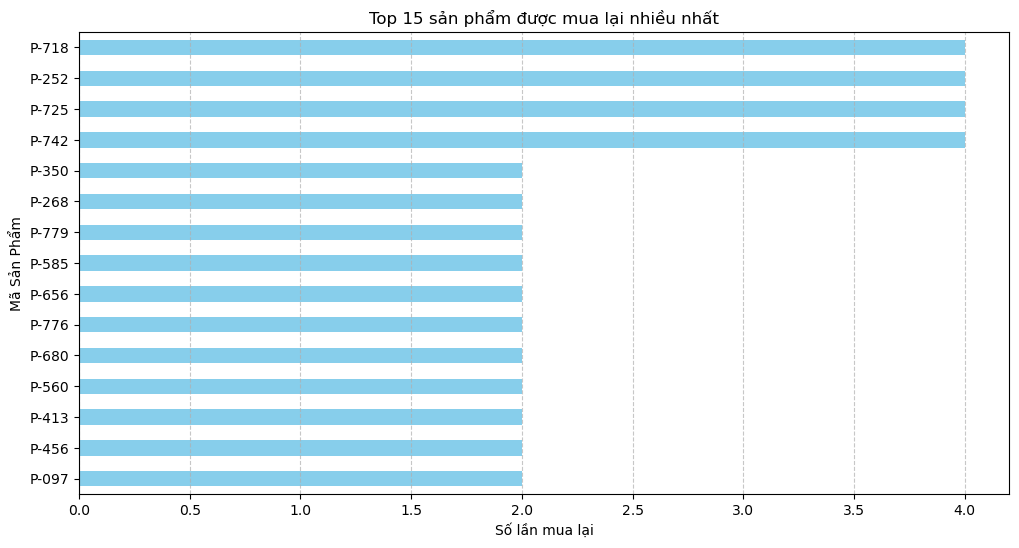

In [78]:
plt.figure(figsize=(12, 6))
product_repeat_counts.sort_values().plot(kind="barh", color="skyblue")
plt.xlabel("Số lần mua lại")
plt.ylabel("Mã Sản Phẩm")
plt.title("Top 15 sản phẩm được mua lại nhiều nhất")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# tăng trưởng (maybe)

In [79]:
# Chuyển đổi cột "Ngày hạch toán" sang định dạng datetime
df_merged["Ngày hạch toán"] = pd.to_datetime(df_merged["Ngày hạch toán"], errors="coerce")

# Tạo cột "Tháng" từ "Ngày hạch toán"
df_merged["Tháng"] = df_merged["Ngày hạch toán"].dt.to_period("M")

# Tính tổng doanh số theo tháng cho từng sản phẩm
df_trend = df_merged.groupby(["Tháng", "Sản phẩm_x"])["Số lượng bán"].sum().reset_index()

# Tính % tăng trưởng doanh số theo tháng
df_trend["Tăng trưởng (%)"] = df_trend.groupby("Sản phẩm_x")["Số lượng bán"].pct_change() * 100

# Lọc các sản phẩm có mức tăng trưởng dương trong 3 tháng gần nhất
recent_months = df_trend["Tháng"].max() - 2  # Lấy 3 tháng gần nhất
df_trend_recent = df_trend[df_trend["Tháng"] >= recent_months]

# Tính trung bình tăng trưởng trong 3 tháng gần nhất
df_trend_summary = df_trend_recent.groupby("Sản phẩm_x")["Tăng trưởng (%)"].mean().reset_index()

# Lọc ra sản phẩm có mức tăng trưởng trung bình > 10% trong 3 tháng gần nhất (ứng viên "ngôi sao")
sp_sao = df_trend_summary[df_trend_summary["Tăng trưởng (%)"] > 10].sort_values(by="Tăng trưởng (%)", ascending=False)

# Hiển thị danh sách sản phẩm tiềm năng
sp_sao.head()


,Sản phẩm_x,Tăng trưởng (%)
112,Hỗ trợ kỹ thuật Phần mềm 1 năm Oracle MySQL St...,1400.0
239,Phần mềm Acrobat Pro DC for teams ALL Multiple...,1200.0
377,Phần mềm Illustrator CC for teams ALL Multiple...,1100.0
375,Phần mềm Illustrator CC for teams ALL Multipl...,1005.0
51,Bộ thu phát Linksys LAP AC1750 POE,950.0


In [80]:
#df_top_stars["Số lượng bán"] = pd.to_numeric(df_top_stars["Số lượng bán"], errors="coerce").fillna(0)

In [81]:
top_star_products = sp_sao["Sản phẩm_x"].head(5).tolist()
df_top_stars = df_trend[df_trend["Sản phẩm_x"].isin(top_star_products)]

# Vẽ biểu đồ xu hướng doanh số của các sản phẩm này theo thời gian
#plt.figure(figsize=(12, 6))
#sns.lineplot(data=df_top_stars, x="Tháng", y="Số lượng bán", hue="Sản phẩm_x", marker="o")

#plt.xlabel("Tháng")
#plt.ylabel("Số lượng bán")
#plt.title("Xu hướng tăng trưởng doanh số của sản phẩm tiềm năng 'ngôi sao'")
#plt.xticks(rotation=45)
#plt.legend(title="Sản phẩm")
#plt.grid(True)
#plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\1297784114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_stars["Tháng"] = df_top_stars["Tháng"].astype(str)


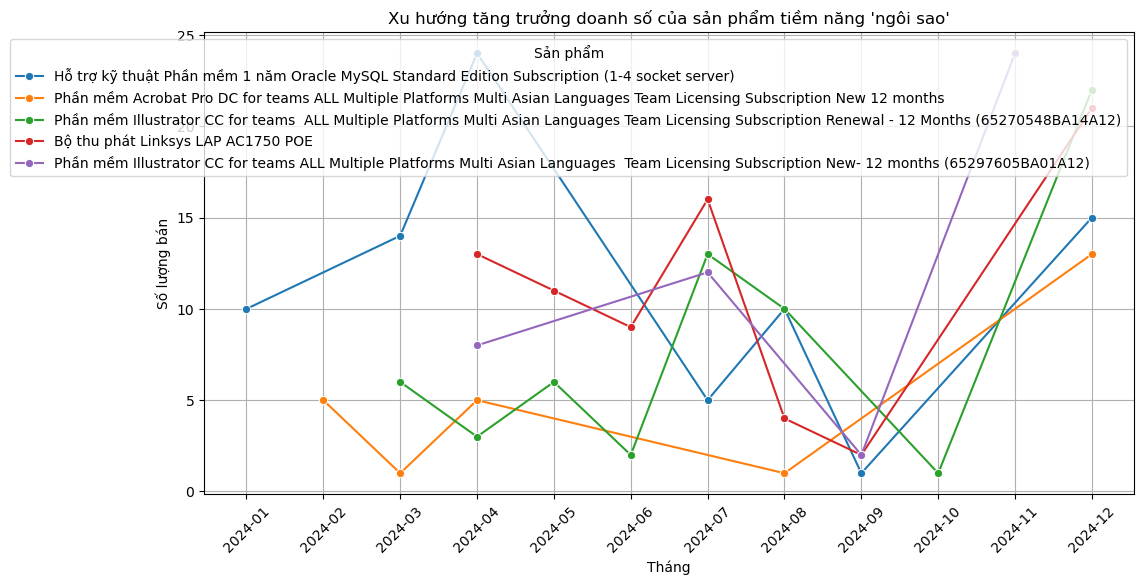

In [82]:
# Chuyển đổi cột "Tháng" về dạng chuỗi để hiển thị trên biểu đồ
df_top_stars["Tháng"] = df_top_stars["Tháng"].astype(str)

# Vẽ biểu đồ xu hướng doanh số
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_stars, x="Tháng", y="Số lượng bán", hue="Sản phẩm_x", marker="o")

plt.xlabel("Tháng")
plt.ylabel("Số lượng bán")
plt.title("Xu hướng tăng trưởng doanh số của sản phẩm tiềm năng 'ngôi sao'")
plt.xticks(rotation=45)
plt.legend(title="Sản phẩm")
plt.grid(True)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\1297784114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_stars["Tháng"] = df_top_stars["Tháng"].astype(str)


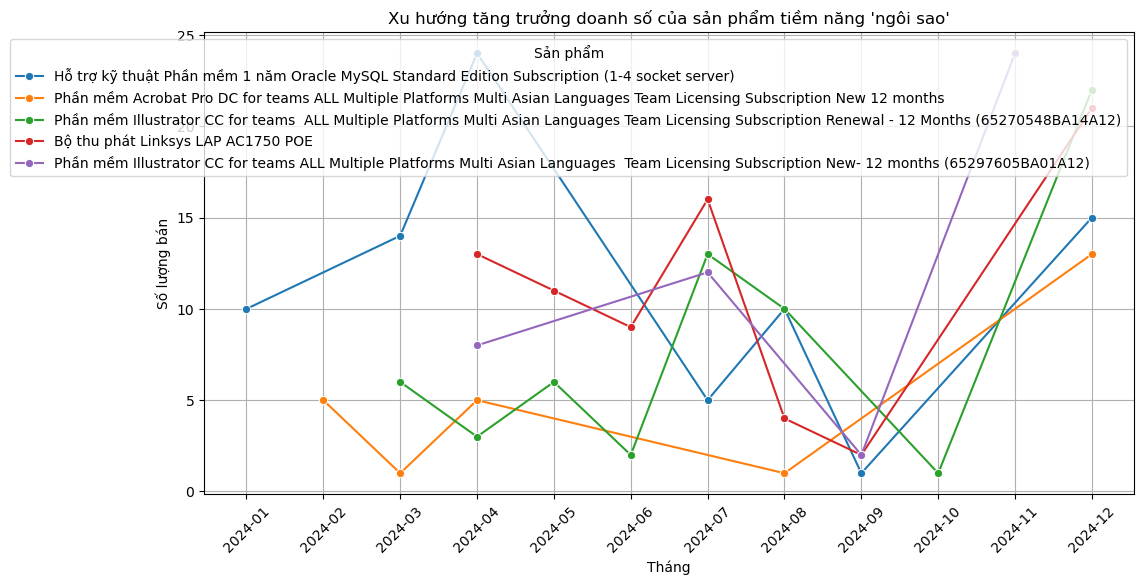

In [83]:
# Chuyển đổi cột "Tháng" về dạng chuỗi để hiển thị trên biểu đồ
df_top_stars["Tháng"] = df_top_stars["Tháng"].astype(str)

# Vẽ biểu đồ xu hướng doanh số
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_stars, x="Tháng", y="Số lượng bán", hue="Sản phẩm_x", marker="o")

plt.xlabel("Tháng")
plt.ylabel("Số lượng bán")
plt.title("Xu hướng tăng trưởng doanh số của sản phẩm tiềm năng 'ngôi sao'")
plt.xticks(rotation=45)
plt.legend(title="Sản phẩm")
plt.grid(True)
plt.show()

In [84]:
# Tính tổng lợi nhuận theo khách hàng
df_profit_by_customer = df_merged.groupby("Mã KH")["Lợi nhuận"].sum().reset_index()

# Sắp xếp khách hàng theo lợi nhuận đóng góp cao nhất
df_profit_by_customer = df_profit_by_customer.sort_values(by="Lợi nhuận", ascending=False)

# Hiển thị top 10 khách hàng có lợi nhuận cao nhất
df_profit_by_customer.head(10)

,Mã KH,Lợi nhuận
785,KH-0786,2708235000
629,KH-0630,2648860000
27,KH-0028,2524395000
302,KH-0303,2480640000
41,KH-0042,2334095000
218,KH-0219,2162615000
176,KH-0177,2150870000
242,KH-0243,2058165000
646,KH-0647,1999145000
260,KH-0261,1880755000


In [85]:
# Chuyển đổi cột "Ngày hạch toán" sang datetime
df_merged["Ngày hạch toán"] = pd.to_datetime(df_merged["Ngày hạch toán"])

# Tính số ngày giữa các lần mua hàng của từng khách hàng
df_merged = df_merged.sort_values(by=["Mã KH", "Ngày hạch toán"])
df_merged["Ngày trước đó"] = df_merged.groupby("Mã KH")["Ngày hạch toán"].shift(1)
df_merged["Khoảng cách mua (ngày)"] = (df_merged["Ngày hạch toán"] - df_merged["Ngày trước đó"]).dt.days

# Tính trung bình số ngày quay lại mua của mỗi khách hàng
df_customer_lifecycle = df_merged.groupby("Mã KH")["Khoảng cách mua (ngày)"].mean().reset_index()

# Hiển thị kết quả
df_customer_lifecycle.head(10)

,Mã KH,Khoảng cách mua (ngày)
0,KH-0001,25.076923
1,KH-0002,34.222222
2,KH-0003,55.800000
3,KH-0004,22.916667
4,KH-0005,18.631579
5,KH-0006,26.545455
6,KH-0007,30.900000
7,KH-0008,21.533333
8,KH-0009,31.090909
9,KH-0010,32.900000


In [86]:
# Tính doanh số và lợi nhuận trung bình của từng sản phẩm
df_product_analysis = df_merged.groupby("Sản phẩm_x").agg({"Số lượng bán": "sum", "Lợi nhuận": "sum"}).reset_index()

# Xác định sản phẩm có doanh số thấp nhưng chiếm nhiều tài nguyên (lợi nhuận thấp)
df_low_performance = df_product_analysis[(df_product_analysis["Số lượng bán"] < df_product_analysis["Số lượng bán"].median()) & 
                                         (df_product_analysis["Lợi nhuận"] < df_product_analysis["Lợi nhuận"].median())]

# Hiển thị danh sách sản phẩm có hiệu suất thấp
df_low_performance.head(10)

,Sản phẩm_x,Số lượng bán,Lợi nhuận
1,Phần mềm SYMC ENDPOINT PROTECTION 14 PER USER...,35,29925000
3,Phần mềm winpro 10 64bit Eng Intl 1pk DSP OEI...,37,36260000
4,Bo mạch chính ASUS,42,17010000
6,Bàn phím Genius KB-110 (USB),67,2680000
8,Bàn phím vi tính Fuhlen L411,61,2440000
9,Bản quyền Phần mềm Kaspersky Ksos 4 for DT + ...,29,29145000
12,Bản quyền phần mềm Kaspesky Anti Virus cho 3 m...,62,6200000
15,Bản quyền phần mềm dùng cho máy vi tính AVG An...,60,12300000
19,Bảng mạch chính ASUS H110M-D,46,22540000
22,"Bộ chuyển mạch HP Switch 1410-24G, HP WTY_9196...",61,75640000


# Sản phẩm mua cùng nhau

In [87]:
from itertools import combinations
from collections import Counter

In [88]:
# Nhóm các sản phẩm theo từng đơn hàng
order_products = df_sales.groupby("Đơn hàng")["Mã Sản Phẩm"].apply(list)

# Đếm tần suất xuất hiện của từng cặp sản phẩm
pair_counts = Counter()
for products in order_products:
    for pair in combinations(sorted(products), 2):  # Tạo tất cả các cặp sản phẩm trong cùng 1 đơn hàng
        pair_counts[pair] += 1

# Chuyển kết quả thành DataFrame
df_pairs = pd.DataFrame(pair_counts.items(), columns=["Cặp sản phẩm", "Số lần mua cùng nhau"])

# Lấy top 10 cặp sản phẩm được mua cùng nhau nhiều nhất
df_top_pairs = df_pairs.sort_values("Số lần mua cùng nhau", ascending=False).head(10)

# Hiển thị kết quả
df_pairs


,Cặp sản phẩm,Số lần mua cùng nhau
0,"(P-105, P-437)",1
1,"(P-133, P-713)",1
2,"(P-118, P-633)",1
3,"(P-130, P-252)",1
4,"(P-083, P-688)",1
5,"(P-436, P-698)",1


có vẻ k ổn :v

# Phân cụm test

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [90]:
# 1. Tổng hợp doanh thu và số lượng bán theo mã sản phẩm
rev_sum = df_sales.groupby('Mã Sản Phẩm')['Doanh thu'].sum().reset_index()
unit_sum = df_sales.groupby('Mã Sản Phẩm')['Số lượng bán'].sum().reset_index()

df_cluster = pd.merge(rev_sum, unit_sum, on='Mã Sản Phẩm')

In [91]:
# 2. Tìm số cụm tối ưu bằng phương pháp Elbow và Silhouette Score
losses = []
silhouette_scores = []
K = 10

for i in range(1, K+1):
    kmeans_i = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans_i.fit(df_cluster[['Doanh thu', 'Số lượng bán']])
    
    d2centroids = cdist(df_cluster[['Doanh thu', 'Số lượng bán']], kmeans_i.cluster_centers_, 'euclidean')
    min_distance = np.min(d2centroids, axis=1)
    loss = np.sum(min_distance)
    losses.append(loss)
    
    if i > 1:
        score = silhouette_score(df_cluster[['Doanh thu', 'Số lượng bán']], kmeans_i.labels_)
        silhouette_scores.append(score)
        print(f'K={i}, silhouette={score:.4f}')
    else:
        print(f'K={i}')

K=1
K=2, silhouette=0.9322
K=3, silhouette=0.8993
K=4, silhouette=0.7992
K=5, silhouette=0.7991
K=6, silhouette=0.7170
K=7, silhouette=0.7003
K=8, silhouette=0.6846
K=9, silhouette=0.6815
K=10, silhouette=0.6746


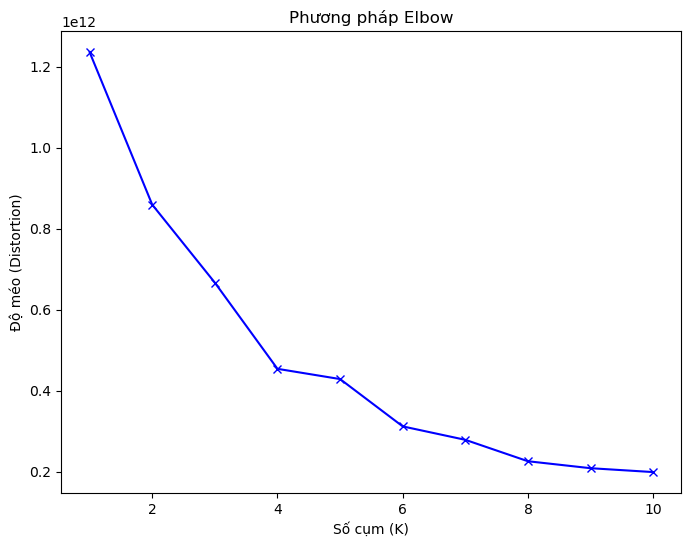

In [92]:
# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, K+1), losses, 'bx-')
plt.xlabel('Số cụm (K)')
plt.ylabel('Độ méo (Distortion)')
plt.title('Phương pháp Elbow')
plt.show()

In [93]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster[['Doanh thu', 'Số lượng bán']])

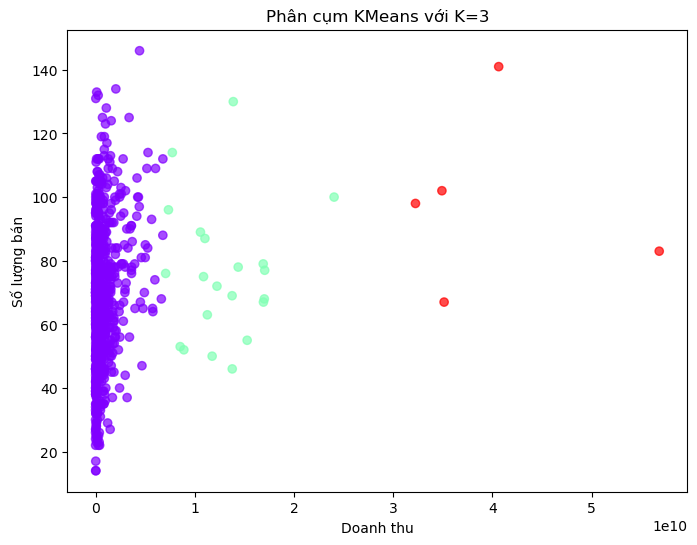

In [94]:
# 4. Vẽ biểu đồ phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(df_cluster['Doanh thu'], df_cluster['Số lượng bán'], c=df_cluster['Cluster'], cmap='rainbow', alpha=0.7)
plt.xlabel('Doanh thu')
plt.ylabel('Số lượng bán')
plt.title(f'Phân cụm KMeans với K={optimal_k}')
plt.show()

Nhóm các sản phẩm có doanh thu cao vào một cụm, bất kể số lượng bán ra nhiều hay ít.

Có thể thấy một số sản phẩm có doanh thu cao nhưng không nhất thiết phải có số lượng bán lớn → Đây có thể là các sản phẩm cao cấp, giá trị cao nhưng ít người mua 

Ngược lại, có những sản phẩm có doanh thu thấp vì đơn giá thấp, dù có thể bán khá nhiều.

In [95]:
# 2. Phân cụm theo SỐ LƯỢNG BÁN
kmeans_units = KMeans(n_clusters=3, random_state=0, n_init=10)
df_cluster['Cluster_SoLuong'] = kmeans_units.fit_predict(df_cluster[['Số lượng bán']])


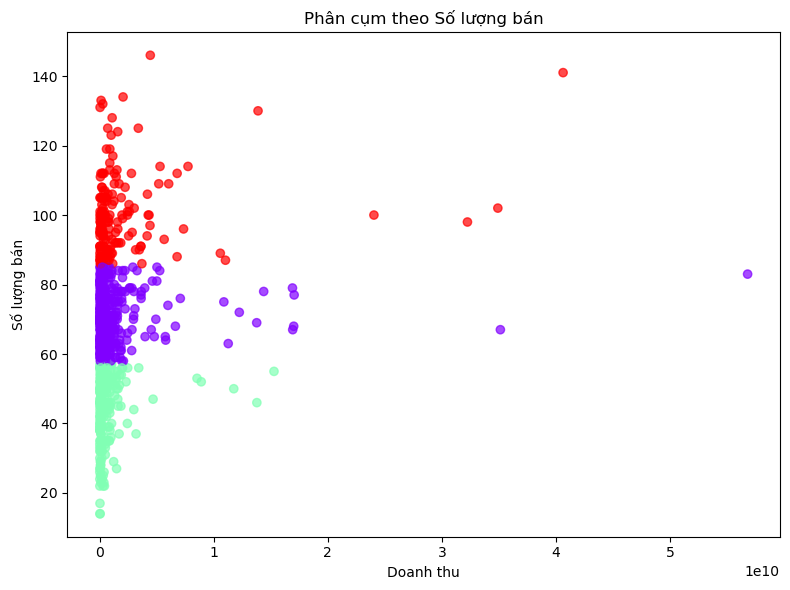

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cluster['Doanh thu'], df_cluster['Số lượng bán'], c=df_cluster['Cluster_SoLuong'], cmap='rainbow', alpha=0.7)
plt.xlabel('Doanh thu')
plt.ylabel('Số lượng bán')
plt.title('Phân cụm theo Số lượng bán')

plt.tight_layout()
plt.show()

Nhóm các sản phẩm có số lượng bán cao vào một cụm, không quan tâm đến tổng doanh thu.

Có thể thấy một số sản phẩm bán rất chạy nhưng lại có doanh thu thấp → Đây có thể là phụ kiện hoặc sản phẩm giá rẻ 

Ngược lại, có sản phẩm bán ít nhưng vẫn có doanh thu cao, thường là các sản phẩm cao cấp, giá trị cao.

# Dự báo

In [97]:
df_branch

,Ngày hạch toán,Chi nhánh,Doanh thu,Lợi nhuận,Tỷ lệ lợi nhuận,Tháng
0,2024-01,CN DN,25721265000,8573755000,0.333333,2024-01
1,2024-01,CN HCM,23783910000,7927970000,0.333333,2024-01
2,2024-01,CN HN,27496830000,9165610000,0.333333,2024-01
3,2024-02,CN DN,23726940000,7908980000,0.333333,2024-02
4,2024-02,CN HCM,24442440000,8147480000,0.333333,2024-02
5,2024-02,CN HN,28790850000,9596950000,0.333333,2024-02
6,2024-03,CN DN,29252895000,9750965000,0.333333,2024-03
7,2024-03,CN HCM,30463800000,10154600000,0.333333,2024-03
8,2024-03,CN HN,35365635000,11788545000,0.333333,2024-03
9,2024-04,CN DN,29184300000,9728100000,0.333333,2024-04


In [98]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

sales_data = df_dulieusanpham_clean
branch_data = df_chinhanh
product_data = df_sanpham

In [99]:
sales_data['Ngày hạch toán'] = pd.to_datetime(sales_data['Ngày hạch toán'], dayfirst=True)
sales_data['Month'] = sales_data['Ngày hạch toán'].dt.to_period('M')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\3417778449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Ngày hạch toán'] = pd.to_datetime(sales_data['Ngày hạch toán'], dayfirst=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\3417778449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Month'] = sales_data['Ngày hạch toán'].dt.to_period('M')


In [100]:
agg_sales = sales_data.groupby(['Month', 'Chi nhánh'])['Doanh thu'].sum().reset_index()

In [101]:
min_month = agg_sales['Month'].min()
max_month = agg_sales['Month'].max()
full_months = pd.period_range(start=min_month, end=max_month, freq='M')
branch_sales = {}
for branch in agg_sales['Chi nhánh'].unique():
    branch_df = agg_sales[agg_sales['Chi nhánh'] == branch].set_index('Month')
    full_df = pd.DataFrame(index=full_months, columns=['Doanh thu'])
    full_df['Doanh thu'] = branch_df['Doanh thu']
    full_df.fillna(0, inplace=True)
    branch_sales[branch] = full_df['Doanh thu']

In [102]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
forecast_results = {}
for branch, ts in branch_sales.items():
    model = ExponentialSmoothing(ts, trend='add', seasonal=None)
    fitted_model = model.fit()
    forecast = fitted_model.forecast(12)
    forecast_results[branch] = forecast

c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [103]:
forecast_df = []
for branch, forecast in forecast_results.items():
    temp_df = pd.concat([pd.Series(branch, index=forecast.index), forecast], axis=1)
    temp_df.columns = ['Branch', 'Forecasted_Sales']
    forecast_df.append(temp_df)
forecast_df = pd.concat(forecast_df)
forecast_df.reset_index(inplace=True)
forecast_df.columns = ['Month', 'Branch', 'Forecasted_Sales']

In [104]:
print(forecast_df)

      Month  Branch  Forecasted_Sales
0   2025-01   CN DN      3.313261e+10
1   2025-02   CN DN      3.360228e+10
2   2025-03   CN DN      3.407194e+10
3   2025-04   CN DN      3.454161e+10
4   2025-05   CN DN      3.501128e+10
5   2025-06   CN DN      3.548094e+10
6   2025-07   CN DN      3.595061e+10
7   2025-08   CN DN      3.642028e+10
8   2025-09   CN DN      3.688994e+10
9   2025-10   CN DN      3.735961e+10
10  2025-11   CN DN      3.782927e+10
11  2025-12   CN DN      3.829894e+10
12  2025-01  CN HCM      3.459648e+10
13  2025-02  CN HCM      3.533189e+10
14  2025-03  CN HCM      3.606731e+10
15  2025-04  CN HCM      3.680272e+10
16  2025-05  CN HCM      3.753814e+10
17  2025-06  CN HCM      3.827356e+10
18  2025-07  CN HCM      3.900897e+10
19  2025-08  CN HCM      3.974439e+10
20  2025-09  CN HCM      4.047980e+10
21  2025-10  CN HCM      4.121522e+10
22  2025-11  CN HCM      4.195063e+10
23  2025-12  CN HCM      4.268605e+10
24  2025-01   CN HN      2.434965e+10
25  2025-02 

In [105]:
# Chuyển cột "Month" về dạng datetime
forecast_df["Month"] = forecast_df["Month"].astype(str)  # Chuyển về chuỗi trước
forecast_df["Month"] = pd.to_datetime(forecast_df["Month"])  # Chuyển thành datetime


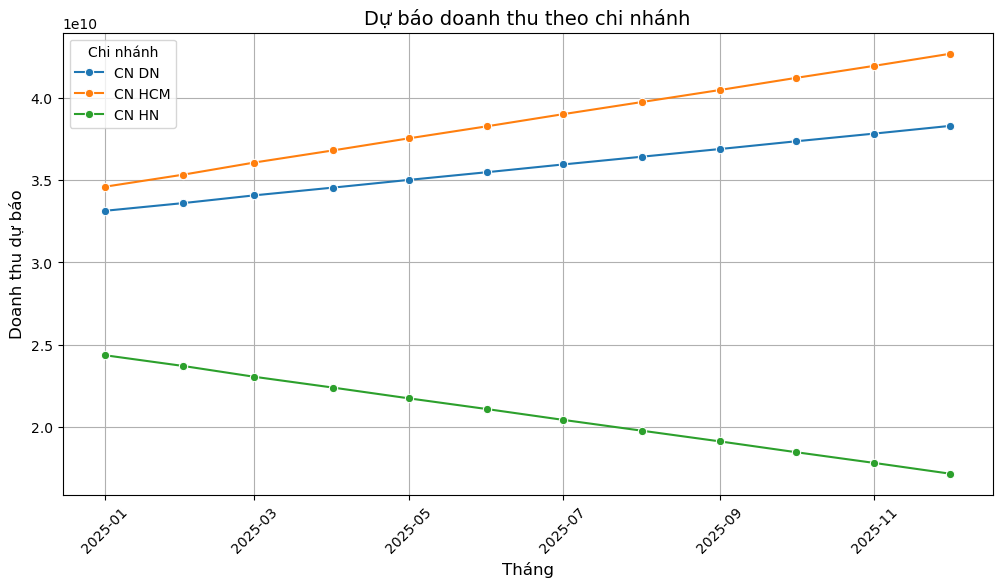

In [106]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=forecast_df, x="Month", y="Forecasted_Sales", hue="Branch", marker="o")
    
plt.title("Dự báo doanh thu theo chi nhánh", fontsize=14)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Doanh thu dự báo", fontsize=12)
plt.xticks(rotation=45)  # Xoay nhãn trục X để dễ nhìn hơn
plt.legend(title="Chi nhánh")
plt.grid(True)
plt.show()

In [107]:
df_sales['Ngày hạch toán'] = pd.to_datetime(df_sales['Ngày hạch toán'])
df_sales = df_sales.sort_values(by='Ngày hạch toán')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19996\91172699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['Ngày hạch toán'] = pd.to_datetime(df_sales['Ngày hạch toán'])


In [108]:
df_sales.head(3)

,Ngày hạch toán,Đơn hàng,Mã KH,Mã Sản Phẩm,Số lượng bán,Đơn giá,Doanh thu,Giá vốn hàng hóa,Mã nhân viên bán,Chi nhánh,Mã Sản phẩm,Sản phẩm,Nhóm sản phẩm,Giá vốn,Lợi nhuận,Tháng,Ngày trong tuần,Month
0,2024-01-01,ĐH3381365,KH-0052,P-396,10,1215000,12150000,8100000,NV190,CN HN,P-396,Bo mạch chính ASUS,Phụ kiện,810000,4050000,2024-01,Monday,2024-01
26,2024-01-01,ĐH6956293,KH-0575,P-351,3,1080000,3240000,2160000,NV065,CN HN,P-351,Phần mềm SYMC ENDPOINT PROTECTION 12.1 PER USE...,Phần mềm,720000,1080000,2024-01,Monday,2024-01
25,2024-01-01,ĐH9273137,KH-0583,P-321,9,6045000,54405000,36270000,NV170,CN HCM,P-321,Phần mềm Camtasia-9 Electronic 1 Single User C...,Phần mềm,4030000,18135000,2024-01,Monday,2024-01


12:08:00 - cmdstanpy - INFO - Chain [1] start processing
12:08:00 - cmdstanpy - INFO - Chain [1] done processing


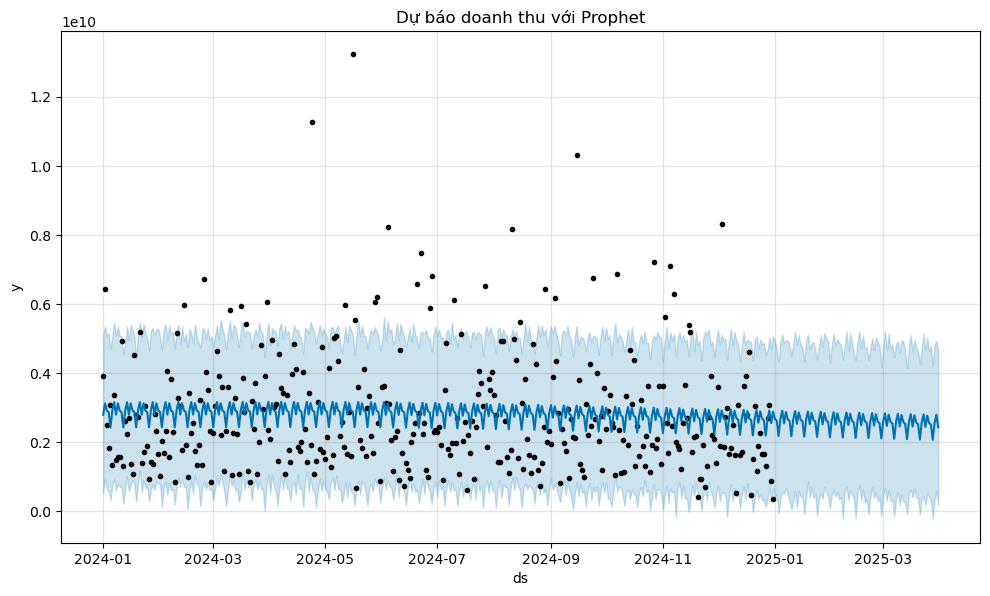

In [109]:
# Dự báo doanh thu & doanh số bán hàng với Prophet
df_grouped = df_sales.groupby('Ngày hạch toán')["Doanh thu"].sum().reset_index()
df_grouped.columns = ['ds', 'y']
model = Prophet()
model.fit(df_grouped)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
model.plot(forecast)
plt.title("Dự báo doanh thu với Prophet")
plt.show()

In [110]:
# Phân tích khách hàng mang lại lợi nhuận cao nhất (RFM Analysis)
rfm = df_sales.groupby("Mã KH").agg({
    "Ngày hạch toán": lambda x: (df_sales["Ngày hạch toán"].max() - x.max()).days,
    "Đơn hàng": "count",
    "Doanh thu": "sum"
}).reset_index()
rfm.columns = ["Mã KH", "Recency", "Frequency", "Monetary"]
top_customers = rfm.nlargest(5, "Monetary")

In [111]:
# Dự báo thời điểm khách hàng quay lại mua hàng
df_repeat = df_sales.groupby("Mã KH").agg({"Ngày hạch toán": ["min", "max", "count"]})
df_repeat.columns = ["first_purchase", "last_purchase", "purchase_count"]
df_repeat["days_between"] = (df_repeat["last_purchase"] - df_repeat["first_purchase"]).dt.days / df_repeat["purchase_count"]
customer_return = df_repeat.nlargest(5, "days_between")

In [112]:
customer_return

,first_purchase,last_purchase,purchase_count,days_between
Mã KH,,,,
KH-0485,2024-01-08,2024-12-11,4,84.500000
KH-0055,2024-01-04,2024-12-08,5,67.800000
KH-0093,2024-01-02,2024-07-23,3,67.666667
KH-0232,2024-02-26,2024-11-05,4,63.250000
KH-0092,2024-01-09,2024-08-26,4,57.500000


In [113]:
# Phát hiện sản phẩm kìm hãm doanh số
product_sales = df_sales.groupby("Sản phẩm")["Doanh thu"].sum()
correlation_matrix = df_sales.pivot_table(index='Ngày hạch toán', columns='Sản phẩm', values='Doanh thu', aggfunc='sum').corr()
low_correlation = correlation_matrix.mean().nsmallest(5)
low_correlation

Sản phẩm
Phần mềm Trend Micro Internet Security 10 2016                                                           -0.649429
Phần mềm SYMC ENDPOINT PROTECTION 14 PER USER BNDL STD LIC EXPRESS BAND D ESSENTIAL 36 MONTHS            -0.500000
Dây HDMI đồng 100%, 19+1 dài 1.5M Ugreen (10128)                                                         -0.466667
Máy tính xách tay HP Probook 440 G5 3CH00PA                                                              -0.408447
Phần mềm Creative Cloud for teams All Multipe platform Liscesing Sub_65206838BA01A12 (65206838BA01A12)   -0.400000
dtype: float64

In [114]:
# Phân khúc sản phẩm theo doanh thu & số lượng bán (ABC Analysis)
df_product_sales = df_sales.groupby("Sản phẩm").agg({"Doanh thu": "sum", "Số lượng bán": "sum"}).reset_index()
df_product_sales["Phân khúc"] = pd.qcut(df_product_sales["Doanh thu"], q=[0, 0.7, 0.9, 1], labels=["C", "B", "A"])
df_product_sales

,Sản phẩm,Doanh thu,Số lượng bán,Phân khúc
0,Phần mềm MtdEVA-Từ điển Lạc Việt (vĩnh viễn)+...,57330000,98,C
1,Phần mềm SYMC ENDPOINT PROTECTION 14 PER USER...,89775000,35,C
2,Phần mềm SecurityPlus Renewal 8000 Users 3 year,473280000,68,C
3,Phần mềm winpro 10 64bit Eng Intl 1pk DSP OEI...,108780000,37,C
4,Bo mạch chính ASUS,51030000,42,C
...,...,...,...,...
779,Ổ cứng gắn ngoài WD My Passport 3TB,303150000,94,C
780,Ổ cứng gắn trong Samsung SSD 860 EVO 250 GB M2...,127890000,49,C
781,Ổ cứng gắn trong Samsung SSD 860 EVO 250GB Mod...,182700000,70,C
782,"Ổ cứng gắn trong WD Digital 500gb3.5""",61380000,62,C


In [115]:
df_sales["Phân khúc giá"] = pd.qcut(df_sales["Đơn giá"], q=[0, 0.4, 0.8, 1], labels=["Giá rẻ", "Trung cấp", "Cao cấp"])
df_sales.head(5)

,Ngày hạch toán,Đơn hàng,Mã KH,Mã Sản Phẩm,Số lượng bán,Đơn giá,Doanh thu,Giá vốn hàng hóa,Mã nhân viên bán,Chi nhánh,Mã Sản phẩm,Sản phẩm,Nhóm sản phẩm,Giá vốn,Lợi nhuận,Tháng,Ngày trong tuần,Month,Phân khúc giá
0,2024-01-01,ĐH3381365,KH-0052,P-396,10,1215000,12150000,8100000,NV190,CN HN,P-396,Bo mạch chính ASUS,Phụ kiện,810000,4050000,2024-01,Monday,2024-01,Giá rẻ
26,2024-01-01,ĐH6956293,KH-0575,P-351,3,1080000,3240000,2160000,NV065,CN HN,P-351,Phần mềm SYMC ENDPOINT PROTECTION 12.1 PER USE...,Phần mềm,720000,1080000,2024-01,Monday,2024-01,Giá rẻ
25,2024-01-01,ĐH9273137,KH-0583,P-321,9,6045000,54405000,36270000,NV170,CN HCM,P-321,Phần mềm Camtasia-9 Electronic 1 Single User C...,Phần mềm,4030000,18135000,2024-01,Monday,2024-01,Trung cấp
24,2024-01-01,ĐH8663661,KH-0688,P-589,6,1350000,8100000,5400000,NV180,CN HCM,P-589,phần mềm IBM MAIL DUAL ENTITLEMENT PLUS APPLIC...,Phần mềm,900000,2700000,2024-01,Monday,2024-01,Giá rẻ
23,2024-01-01,ĐH4361071,KH-0428,P-489,9,88395000,795555000,530370000,NV143,CN HCM,P-489,Máy tính chủ HP DL120 G9 CTO E5-1620v3(3.5GHz/...,Máy tính,58930000,265185000,2024-01,Monday,2024-01,Cao cấp


In [116]:
# Phân khúc theo tần suất mua hàng
df_freq = df_sales.groupby("Sản phẩm").agg({"Ngày hạch toán": "count"}).reset_index()
df_freq.columns = ["Sản phẩm", "Tần suất mua"]
df_freq["Phân khúc"] = pd.qcut(df_freq["Tần suất mua"], q=[0, 0.4, 0.8, 1], labels=["Ít mua", "Mua trung bình", "Bán chạy"])


In [117]:
print("Khách hàng mang lại lợi nhuận cao nhất:", top_customers)
print("Dự báo thời gian khách hàng quay lại:", customer_return)
print("Sản phẩm kìm hãm doanh số:", low_correlation)


Khách hàng mang lại lợi nhuận cao nhất:        Mã KH  Recency  Frequency    Monetary
785  KH-0786       10         18  8124705000
629  KH-0630       27         12  7946580000
27   KH-0028        2         13  7573185000
302  KH-0303       39         14  7441920000
41   KH-0042       14          9  7002285000
Dự báo thời gian khách hàng quay lại:         first_purchase last_purchase  purchase_count  days_between
Mã KH                                                             
KH-0485     2024-01-08    2024-12-11               4     84.500000
KH-0055     2024-01-04    2024-12-08               5     67.800000
KH-0093     2024-01-02    2024-07-23               3     67.666667
KH-0232     2024-02-26    2024-11-05               4     63.250000
KH-0092     2024-01-09    2024-08-26               4     57.500000
Sản phẩm kìm hãm doanh số: Sản phẩm
Phần mềm Trend Micro Internet Security 10 2016                                                           -0.649429
Phần mềm SYMC ENDPOINT PROTECTIO

In [118]:
print("Phân khúc ABC sản phẩm:", df_product_sales)
print("Phân khúc giá sản phẩm:", df_sales[["Sản phẩm", "Phân khúc giá"]])
print("Phân khúc tần suất mua hàng:", df_freq)

Phân khúc ABC sản phẩm:                                               Sản phẩm  Doanh thu  \
0     Phần mềm MtdEVA-Từ điển Lạc Việt (vĩnh viễn)+...   57330000   
1     Phần mềm SYMC ENDPOINT PROTECTION 14 PER USER...   89775000   
2      Phần mềm SecurityPlus Renewal 8000 Users 3 year  473280000   
3     Phần mềm winpro 10 64bit Eng Intl 1pk DSP OEI...  108780000   
4                                   Bo mạch chính ASUS   51030000   
..                                                 ...        ...   
779                Ổ cứng gắn ngoài WD My Passport 3TB  303150000   
780  Ổ cứng gắn trong Samsung SSD 860 EVO 250 GB M2...  127890000   
781  Ổ cứng gắn trong Samsung SSD 860 EVO 250GB Mod...  182700000   
782              Ổ cứng gắn trong WD Digital 500gb3.5"   61380000   
783  Ổ cứng lắp trong Western Digital RED 2TB3.5 - ...  228480000   

     Số lượng bán Phân khúc  
0              98         C  
1              35         C  
2              68         C  
3              37         C